# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

In [3]:
# !pip install imblearn==0.12.0 This version did not work
# !pip install imblearn I got requirement already satisfied when i ran this tho

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [4]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost import XGBClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV


# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [5]:
df = pd.read_csv('BankChurners.csv')
data = df.copy() # create a copy of the original dataframe

## Data Overview

- Observations
- Sanity checks

### View the first and last 5 rows of the dataset.

In [6]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00000,777,11914.00000,1.33500,1144,42,1.62500,0.06100
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00000,864,7392.00000,1.54100,1291,33,3.71400,0.10500
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00000,0,3418.00000,2.59400,1887,20,2.33300,0.00000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00000,2517,796.00000,1.40500,1171,20,2.33300,0.76000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00000,0,4716.00000,2.17500,816,28,2.50000,0.00000


In [7]:
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.00000,1851,2152.00000,0.70300,15476,117,0.85700,0.46200
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.00000,2186,2091.00000,0.80400,8764,69,0.68300,0.51100
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.00000,0,5409.00000,0.81900,10291,60,0.81800,0.00000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.00000,0,5281.00000,0.53500,8395,62,0.72200,0.00000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.00000,1961,8427.00000,0.70300,10294,61,0.64900,0.18900


* The CLIENTNUM column seems to contain 9 digit unique values which is used to uniquely identify each customers. 

### Understanding the shape fo the dataset.

In [8]:
rows, cols = data.shape      #assigning a variable to the result
print(f'There are {rows} rows and {cols} columns in the data')

There are 10127 rows and 21 columns in the data


### Check the data types of the columns for the dataset.

In [9]:
data.info()
print('-'*60)  # Print a line to separate the information
print('The unique datatypes of the different columns in the datasets are\n1: int64\n2: float64\n3: object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are missing values in two of the fields: "Education_Level & Marital_Status" fields
* There are three unique datatypes in the dataset.

### Statistical summary of the data

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00000,739177606.33366,36903783.45023,708082083.00000,713036770.50000,717926358.00000,773143533.00000,828343083.00000
Customer_Age,10127.00000,46.32596,8.01681,26.00000,41.00000,46.00000,52.00000,73.00000
Dependent_count,10127.00000,2.34620,1.29891,0.00000,1.00000,2.00000,3.00000,5.00000
Months_on_book,10127.00000,35.92841,7.98642,13.00000,31.00000,36.00000,40.00000,56.00000
Total_Relationship_Count,10127.00000,3.81258,1.55441,1.00000,3.00000,4.00000,5.00000,6.00000
Months_Inactive_12_mon,10127.00000,2.34117,1.01062,0.00000,2.00000,2.00000,3.00000,6.00000
Contacts_Count_12_mon,10127.00000,2.45532,1.10623,0.00000,2.00000,2.00000,3.00000,6.00000
Credit_Limit,10127.00000,8631.95370,9088.77665,1438.30000,2555.00000,4549.00000,11067.50000,34516.00000
Total_Revolving_Bal,10127.00000,1162.81406,814.98734,0.00000,359.00000,1276.00000,1784.00000,2517.00000
Avg_Open_To_Buy,10127.00000,7469.13964,9090.68532,3.00000,1324.50000,3474.00000,9859.00000,34516.00000


* Customer_Age: Average age of people in the dataset is around 46 years, age has a wide range from 26 to 73 years.
* Credit_Limit: Around 75% of the customers have credit limit less than 11200.00 USD
* Avg_Open_To_Buy: There's a huge gap between the minimum available amount and the maximum. This is not an outlier.
* Only around 25 % of the customers are above 52 years old
* Total_Revolving_Bal: The average balance carried forward to the next cycle period is around 1162 USD
* Months_Inactive_12_mon: The maximum inactive months in the dataset is 6. There are 7 unique values in the column (0 - 6)
* Contacts_Count_12_mon: The maximum contact count in the dataset is 6. The minimum is 0. There are 7 unique values in the columns

### Checking for missing values

In [11]:
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* Missing values are present in Education_Level and Marital_Status field. We will handle these missing values later on in this project

### Checking for duplicate values

In [12]:
# to view the unique value in each fields
data.nunique() 

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

* The CLIENTNUM field has unique values. I will drop this field from the dataframe.

In [13]:
data.drop('CLIENTNUM', axis=1, inplace=True)
print('...New dataFrame after dropping the CLIENTNUM field')
data.nunique() 

...New dataFrame after dropping the CLIENTNUM field


Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                6
Marital_Status                 3
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

In [14]:
# checking for duplicate values
data.duplicated().sum()

0

* There are no duplicate values in the data.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [18]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

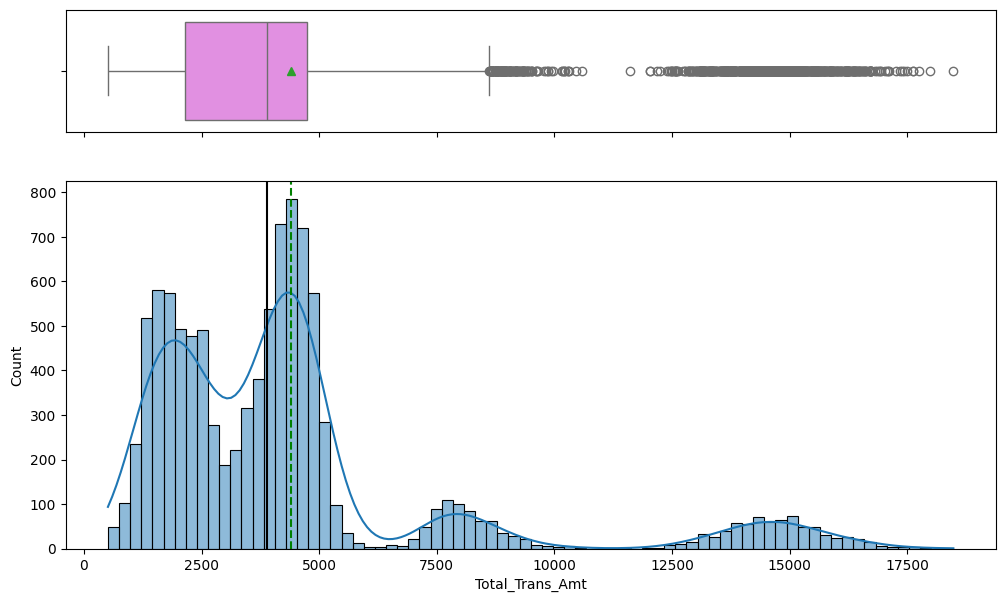

In [19]:
histogram_boxplot(data, "Total_Trans_Amt", kde=True)

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values.
* Around 75% of the total transaction amount for a 12 month average are below 5000.
* Total_Trans_Amt have a heavily right skewed distributions.

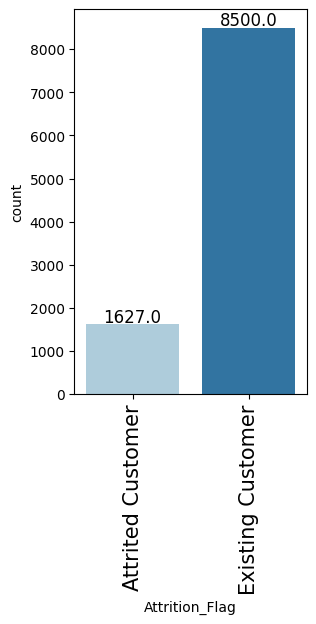

In [20]:
labeled_barplot(data, "Attrition_Flag")

* 16.1% of the customers closed their account (Attrited customers)
* 83.9% of customers still have account with the bank (Existing Customers)

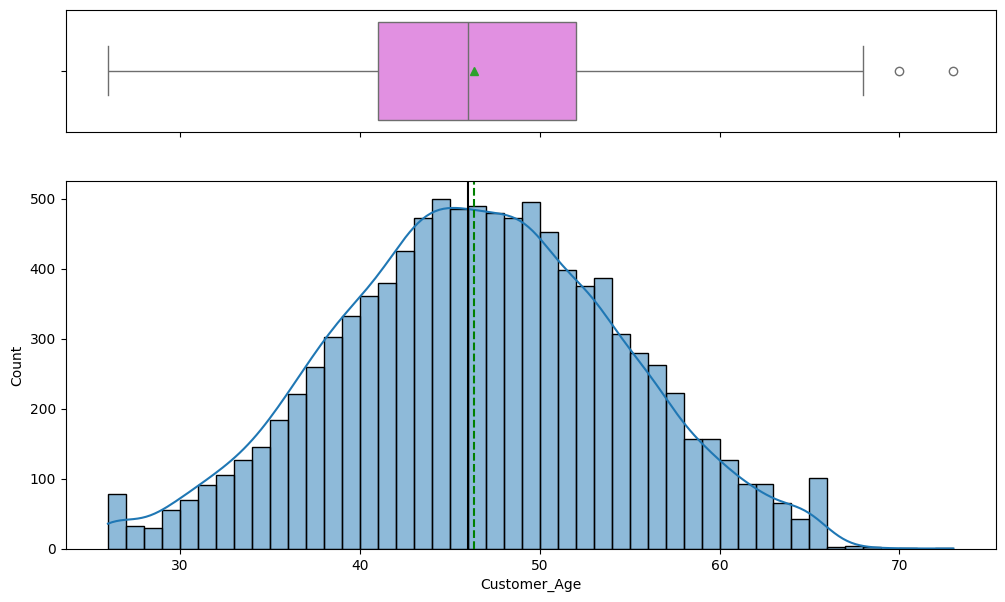

In [21]:
histogram_boxplot(data, "Customer_Age", kde=True)

* The Customer Age distribution looks normal with a mean age of 46 years
* There are no outlier present

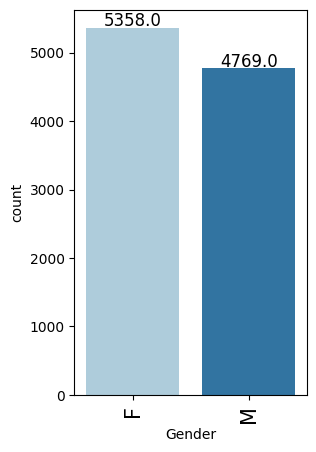

In [22]:
labeled_barplot(data, "Gender")

* Around 53% of the sample size are Female
* Female count are 5358, while male are 4769

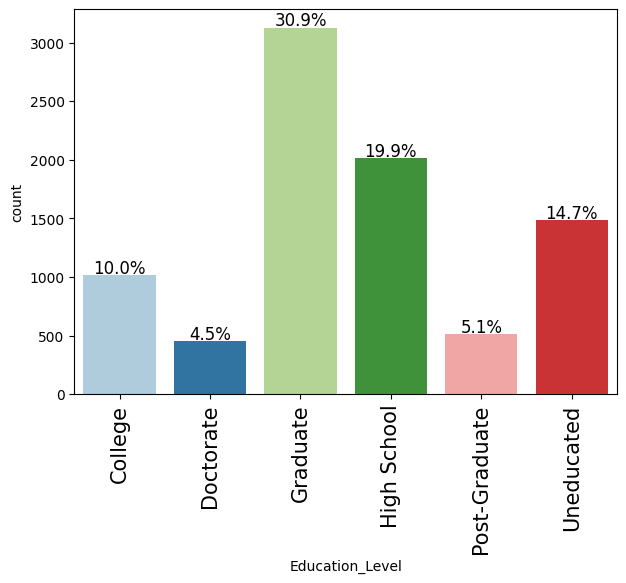

In [23]:
labeled_barplot(data, "Education_Level",perc=True)

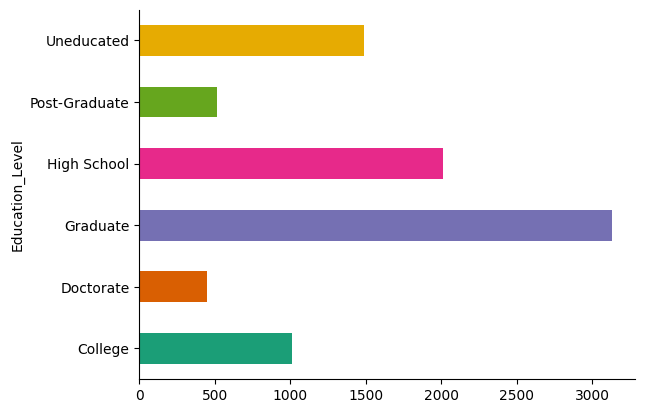

In [24]:
data.groupby('Education_Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

* Majority of the customers are Graduate, followed by High school level, then Uneducated.

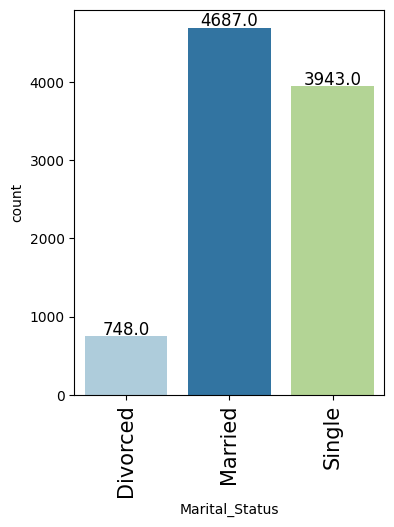

In [25]:
labeled_barplot(data, "Marital_Status")

* 46.3% of the customers are Married, followed by 38.9% are Singles, then 7.4% are Divorced. 7.4% of the Martital Status data are NULL

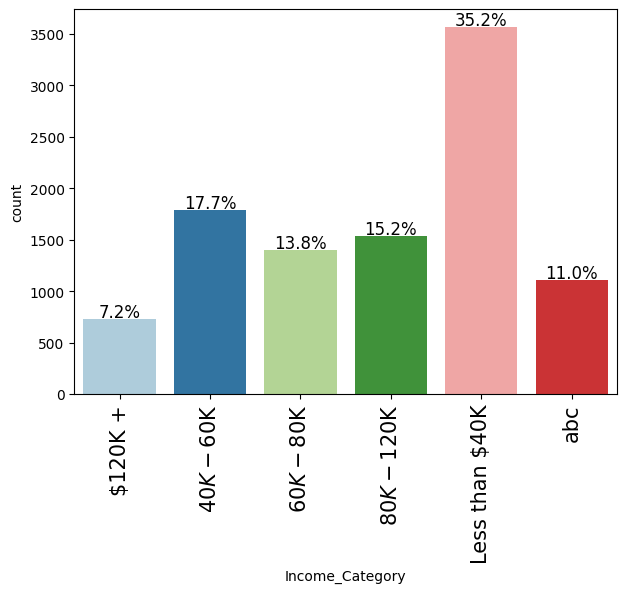

In [26]:
labeled_barplot(data, "Income_Category",perc=True)

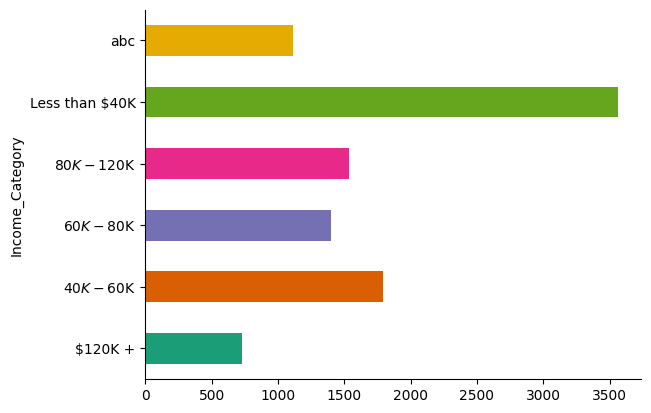

In [27]:
data.groupby('Income_Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

* Majority of the customers earn less than 40K USD per year
* There is a category called "abc". Since this is an ordinal data, we will replace it with NULL during feature engineering phase.

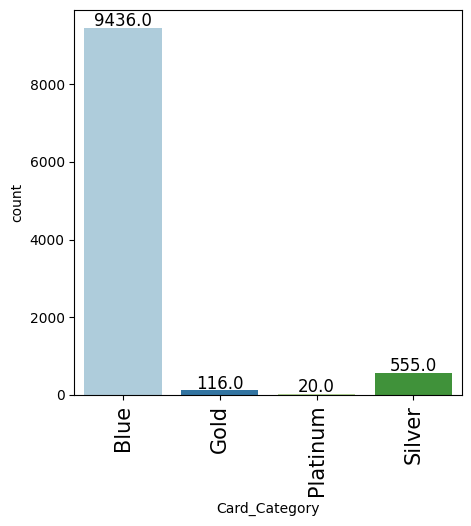

In [28]:
labeled_barplot(data, "Card_Category")

* 93.2 % of the customers prefer Blue type of card
* The least preferred card type is the Platinum card with only ~0.2%

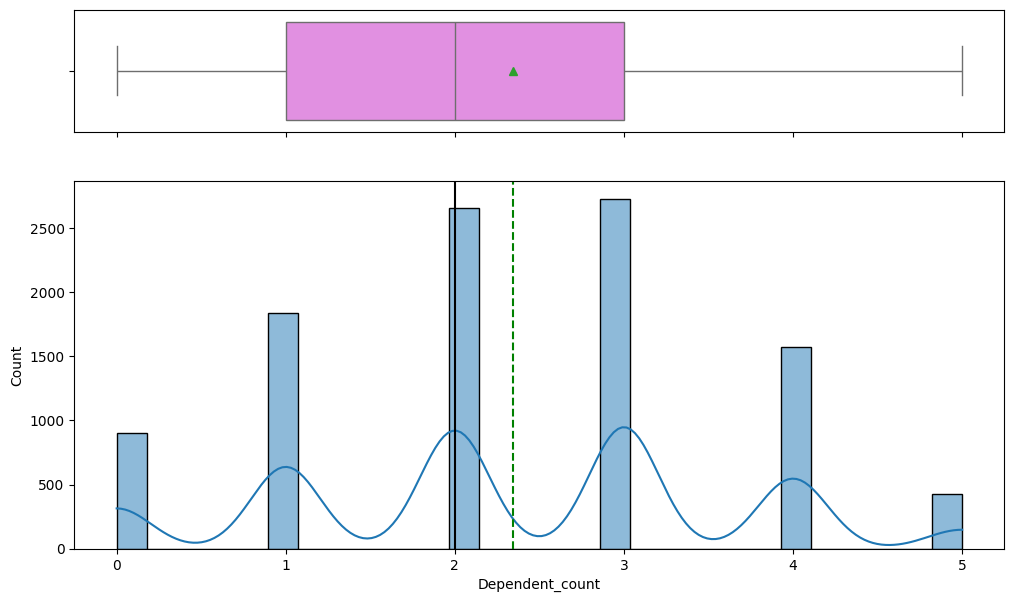

In [29]:
histogram_boxplot(data, "Dependent_count", kde=True)

* The maximum number of dependent in the sample is 5.
* There are no outlier present

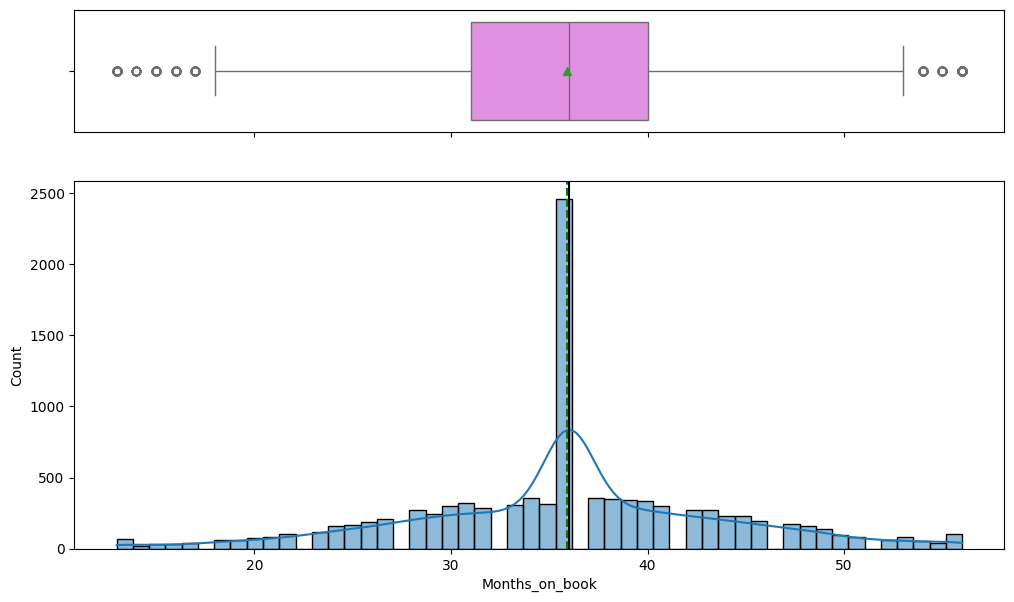

In [30]:
histogram_boxplot(data, "Months_on_book", kde=True)

* The customers average period of relationship with the bank is 36 months
* There seems to be a few outlier
* The minimum month on book is 8 while the maximum is 56

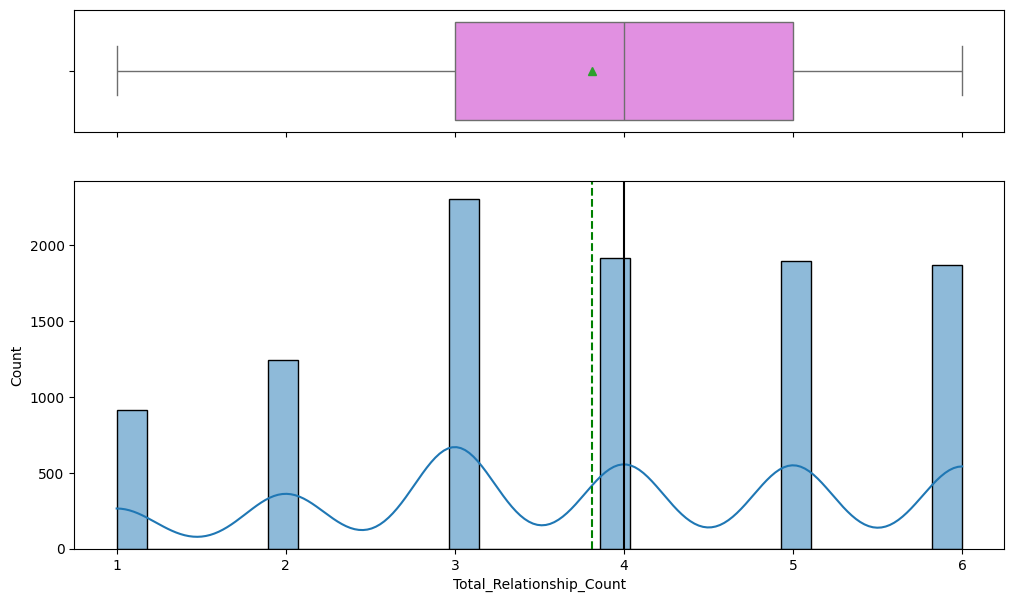

In [31]:
histogram_boxplot(data, "Total_Relationship_Count", kde=True)

* The maximum number of products held by customers is 6.
* Customers with 3 products is has the most occurence in the sample dataset.
* There are no outlier present

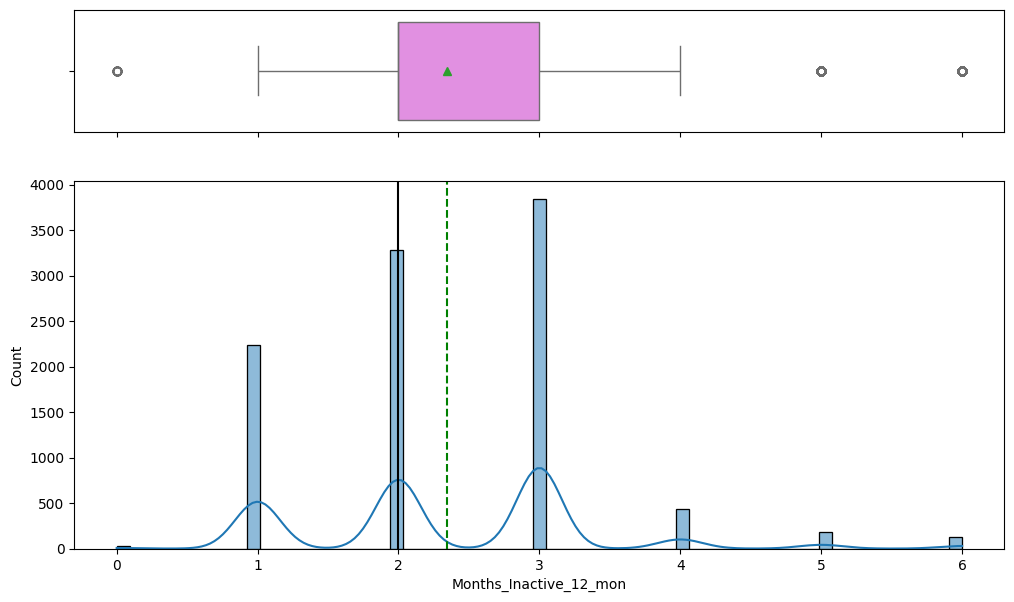

In [32]:
histogram_boxplot(data, "Months_Inactive_12_mon", kde=True)

* The maximum number of inactive months in a year is 6 months. The minimum is 0

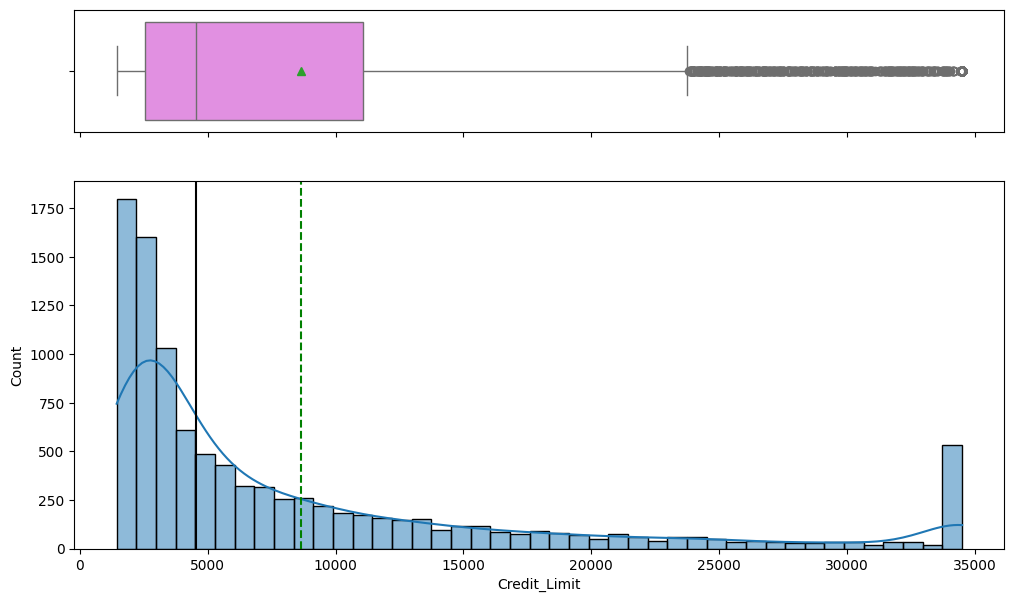

In [33]:
histogram_boxplot(data, "Credit_Limit", kde=True)

* The data is highly right skewed
* There are outliers in the data
* 75% of the customers have less than 12000 credit limit. 

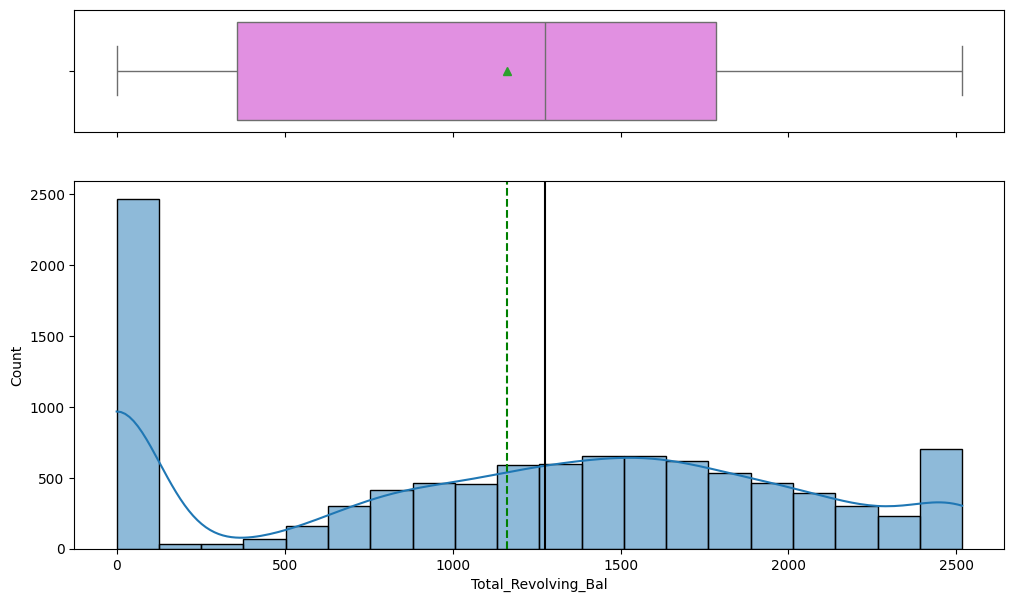

In [34]:
histogram_boxplot(data, "Total_Revolving_Bal", kde=True)

* Majority of the customers carry over 0 balance from month to month
* The maximum bal carried over was around 2600

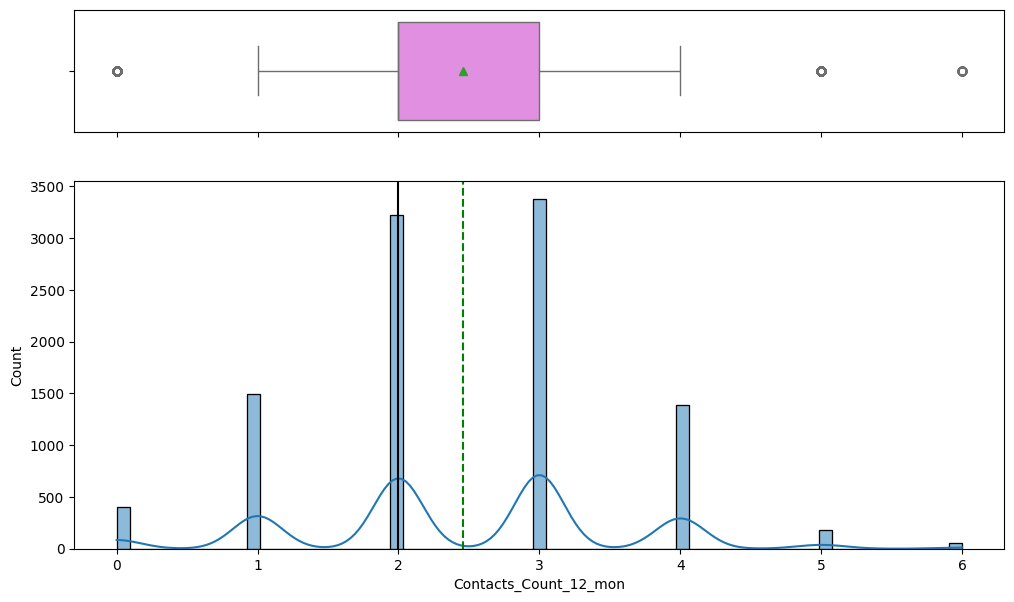

In [35]:
histogram_boxplot(data, "Contacts_Count_12_mon", kde=True)

* 3 is the most occurence times that a customer have contact with the bank in a 12 month window

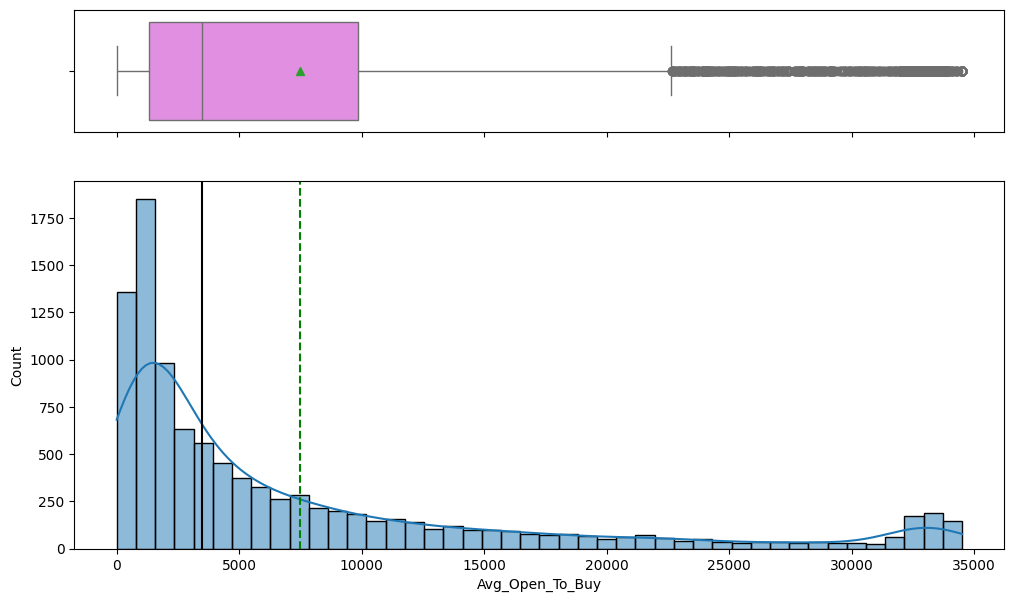

In [36]:
histogram_boxplot(data, "Avg_Open_To_Buy", kde=True)

* The data is highly right skewed
* There are outliers in the data
* Around 25% of the customers have more than 11000 left on their credit card to use (avg of last 12 mnt). 

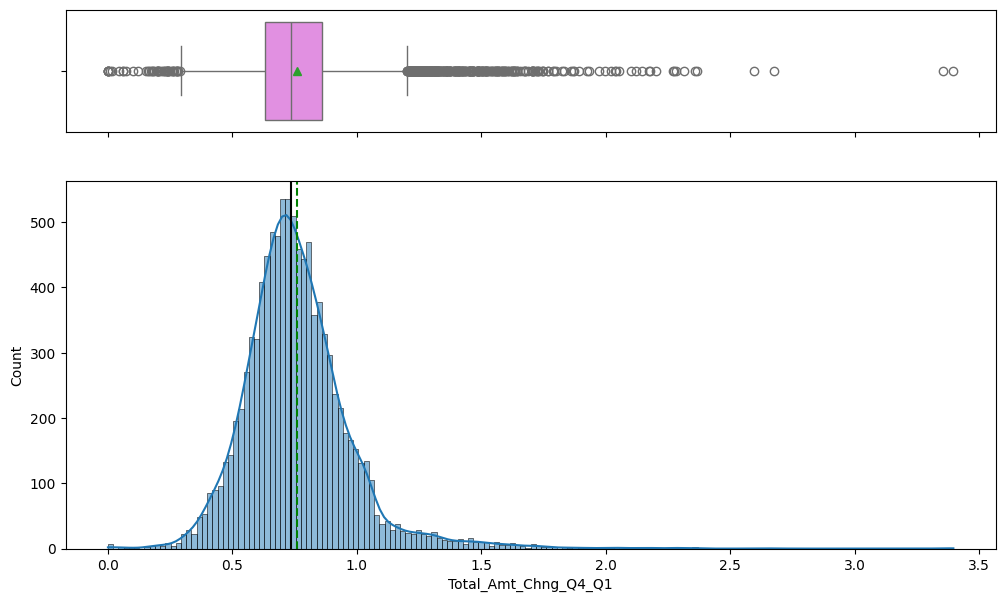

In [37]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1", kde=True)

* There are outliers in the data, but these are valid data as the change amount ranges from 0.00 to ~3.40. So we will not drop them.
* The mean is ~0.76, while the median is ~0.74. The data is normally distributed.

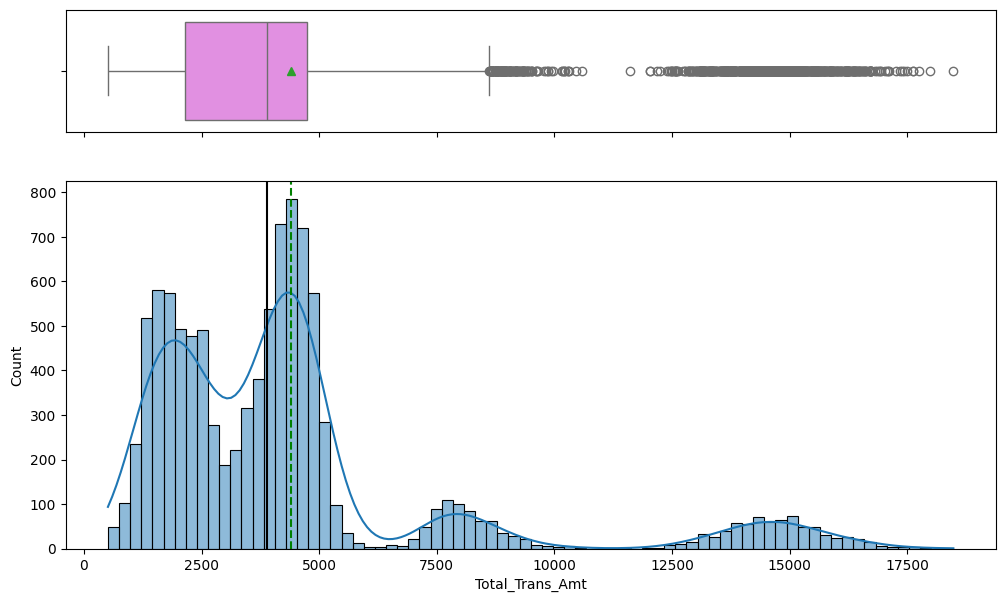

In [38]:
histogram_boxplot(data, "Total_Trans_Amt", kde=True)

* The data is highly right skewed
* There are outliers in the data. Valid outliers, so we cannot drop them.
* Around 75% of the customers spend less than 4700 on their credit card in the last 12 month.

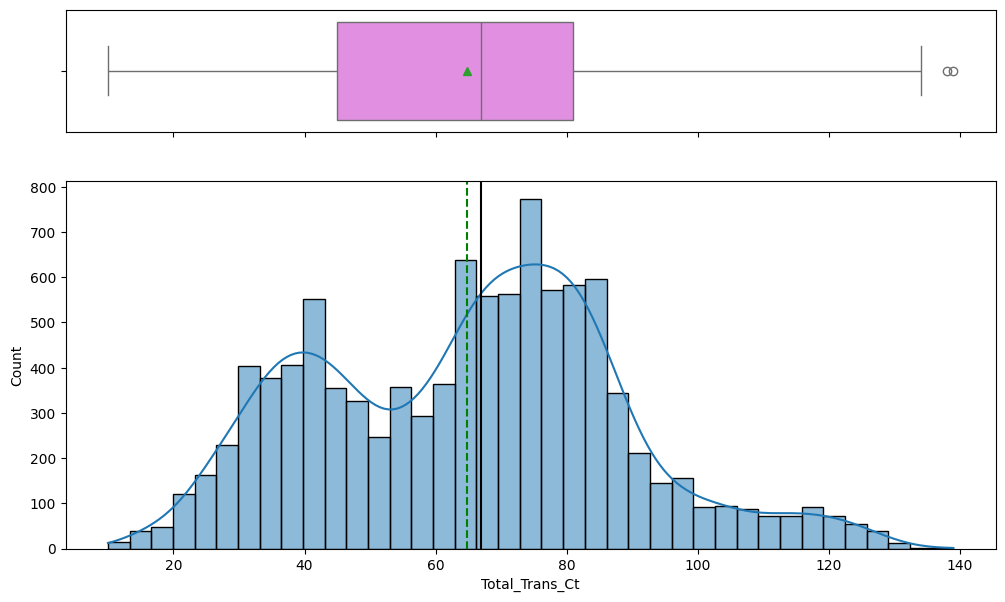

In [39]:
histogram_boxplot(data, "Total_Trans_Ct", kde=True)

* There are no outliers in the data
* The data is normally distributed.

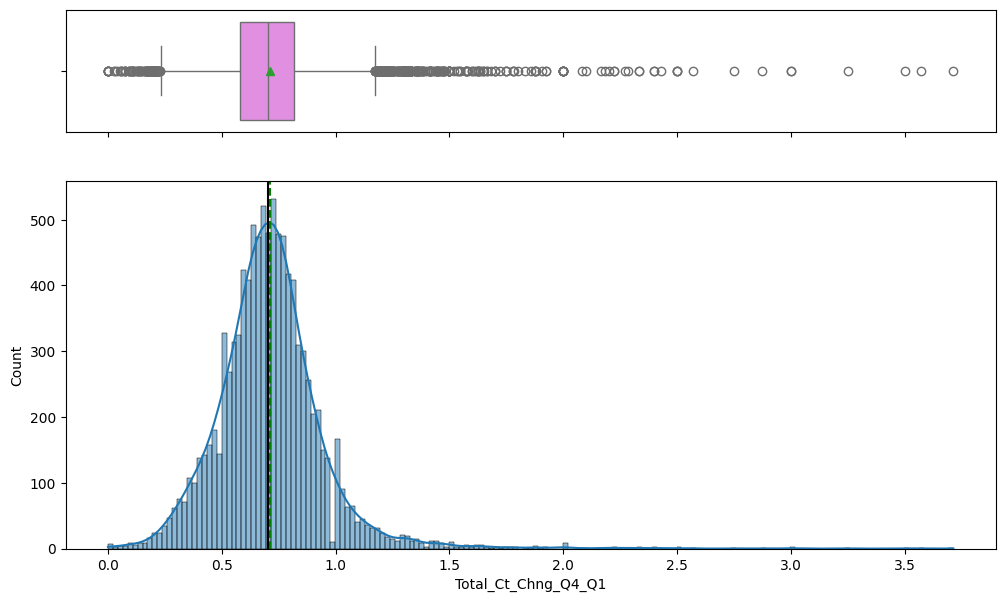

In [40]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1", kde=True)

* Outliers are present in the data
* The data is normally distributed.

### Bivariate Analysis

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


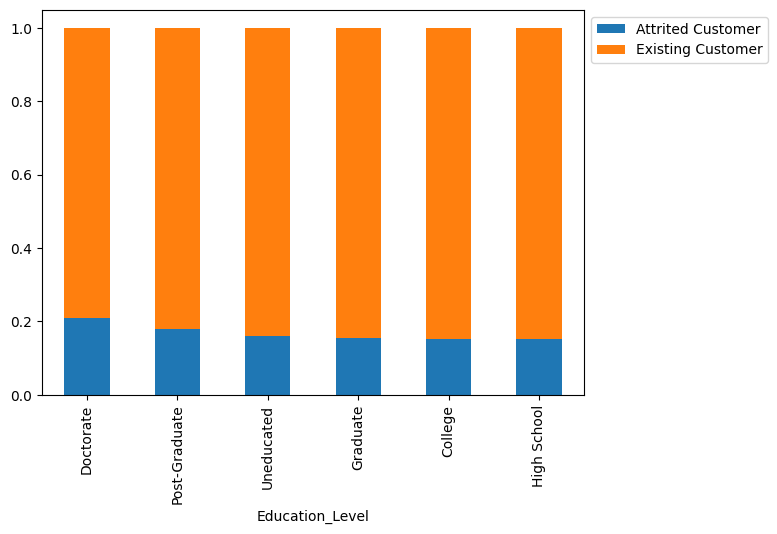

In [41]:
stacked_barplot(data, 'Education_Level', 'Attrition_Flag')

* Doctorates followed by Post-Graduates has the most percentage of customers who renounce their credit card

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


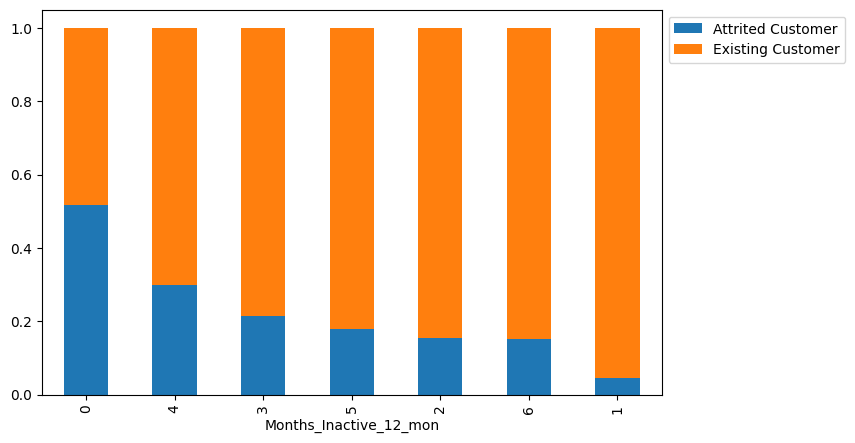

In [42]:
stacked_barplot(data, 'Months_Inactive_12_mon', 'Attrition_Flag')

* Customers with 0 months of inactivity seems to be the most occurence on attrited customers. Further investigation is required
* Customers with greater that 3 months of inacticity within a 12 month window has a high probability of renouncing their credit card

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


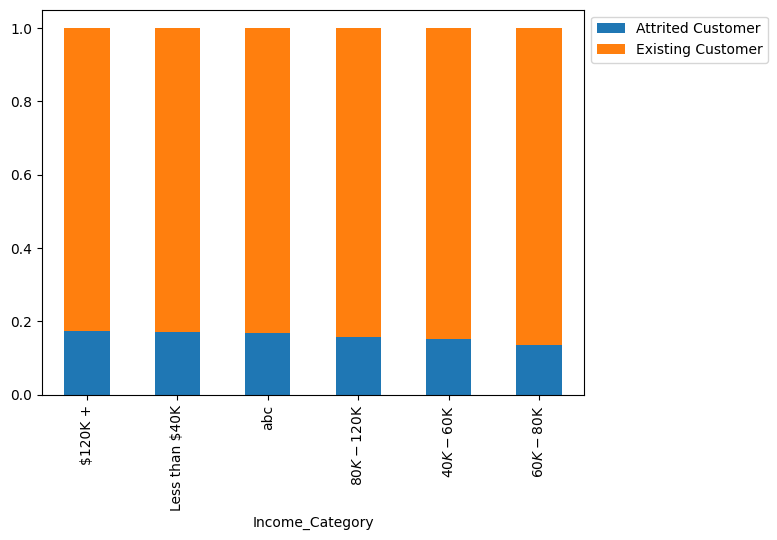

In [43]:
stacked_barplot(data, 'Income_Category', 'Attrition_Flag')

* ~17% of customers who earn over 120k usd renounced their credit card services.
* ~17% of customers who earn less than 40k usd renounced their credit card services as well.

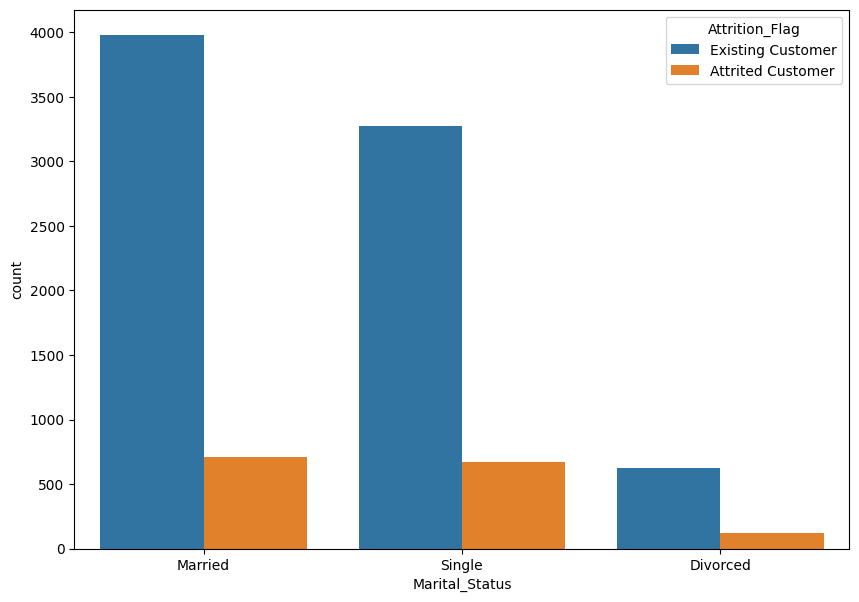

In [44]:
plt.figure(figsize=(10,7))
sns.countplot(data, x='Marital_Status', hue='Attrition_Flag');

* Married customers has the lowest percentage to attrite, hence they are less likely to renounce their credit card services when compared to Singles or divorced.

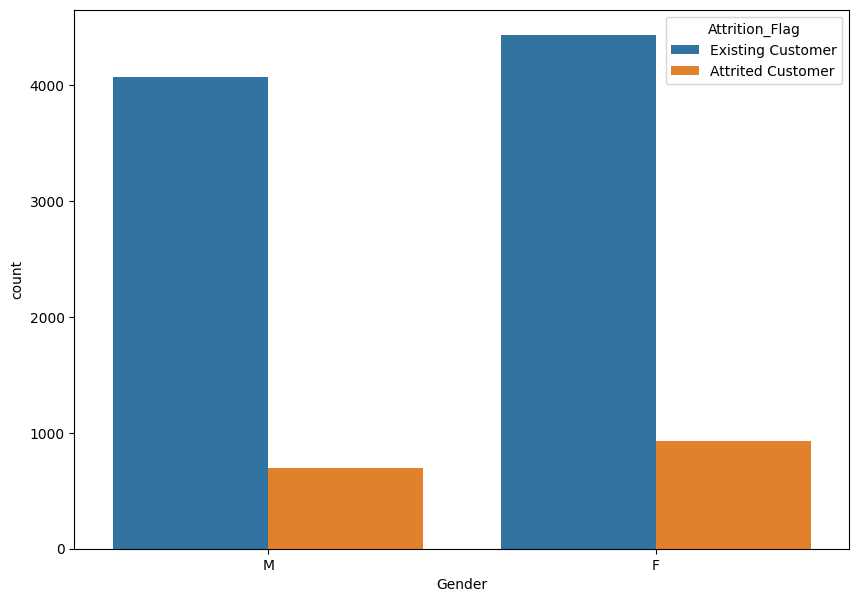

In [45]:
plt.figure(figsize=(10,7))
sns.countplot(data, x='Gender', hue='Attrition_Flag');

* ~17% of female customers attrite. 
* ~15% of male customers attrite. 

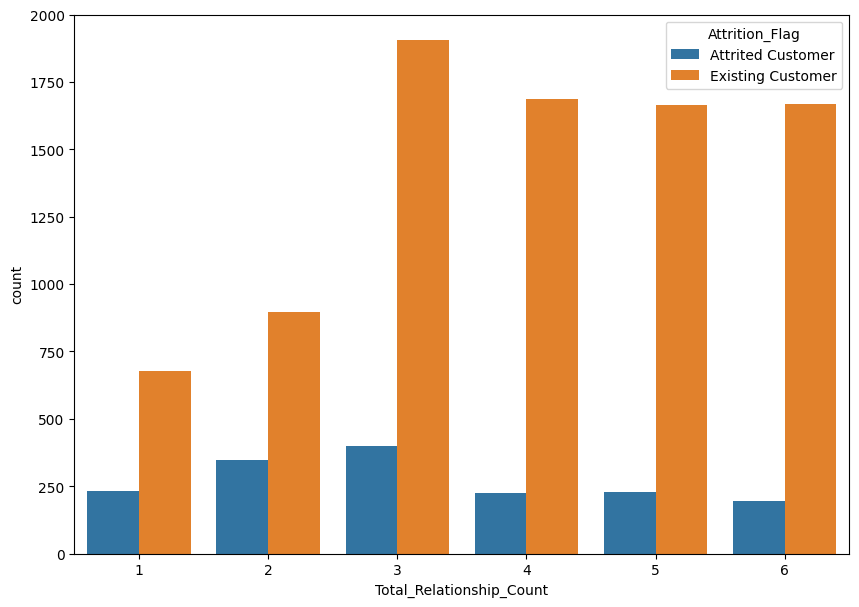

In [46]:
plt.figure(figsize=(10,7))
sns.countplot(data, x='Total_Relationship_Count', hue='Attrition_Flag');

* Customers with 2 relationship count followed by customer with 1 count are more likely to renounce their credit card services

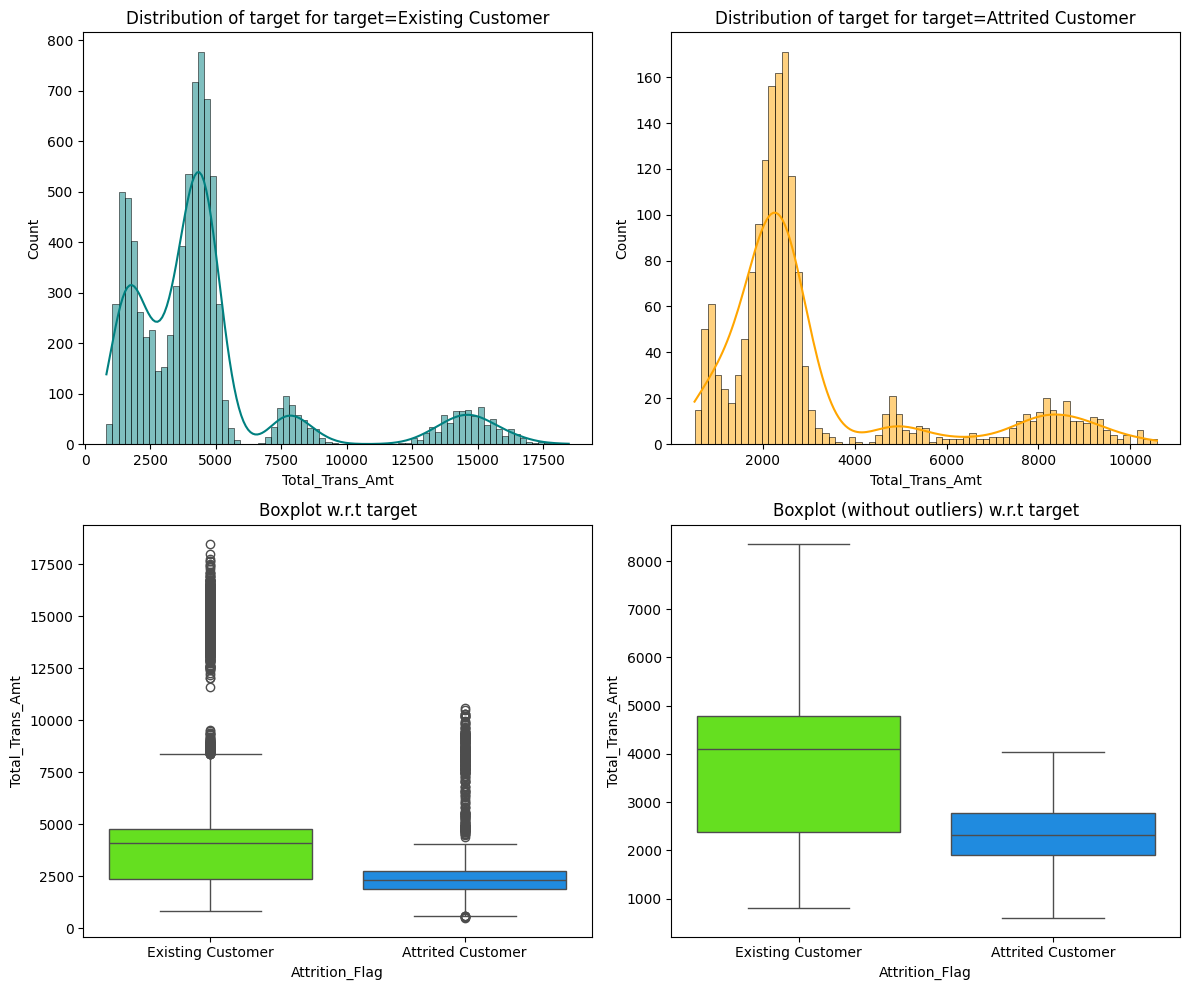

In [47]:
distribution_plot_wrt_target(data, 'Total_Trans_Amt', 'Attrition_Flag')

* Customers with high total transaction amount is less likely to renounce their credit card
* Customers with low total transaction amount might renounce their credit card as they don't have much need for it since their spending is low

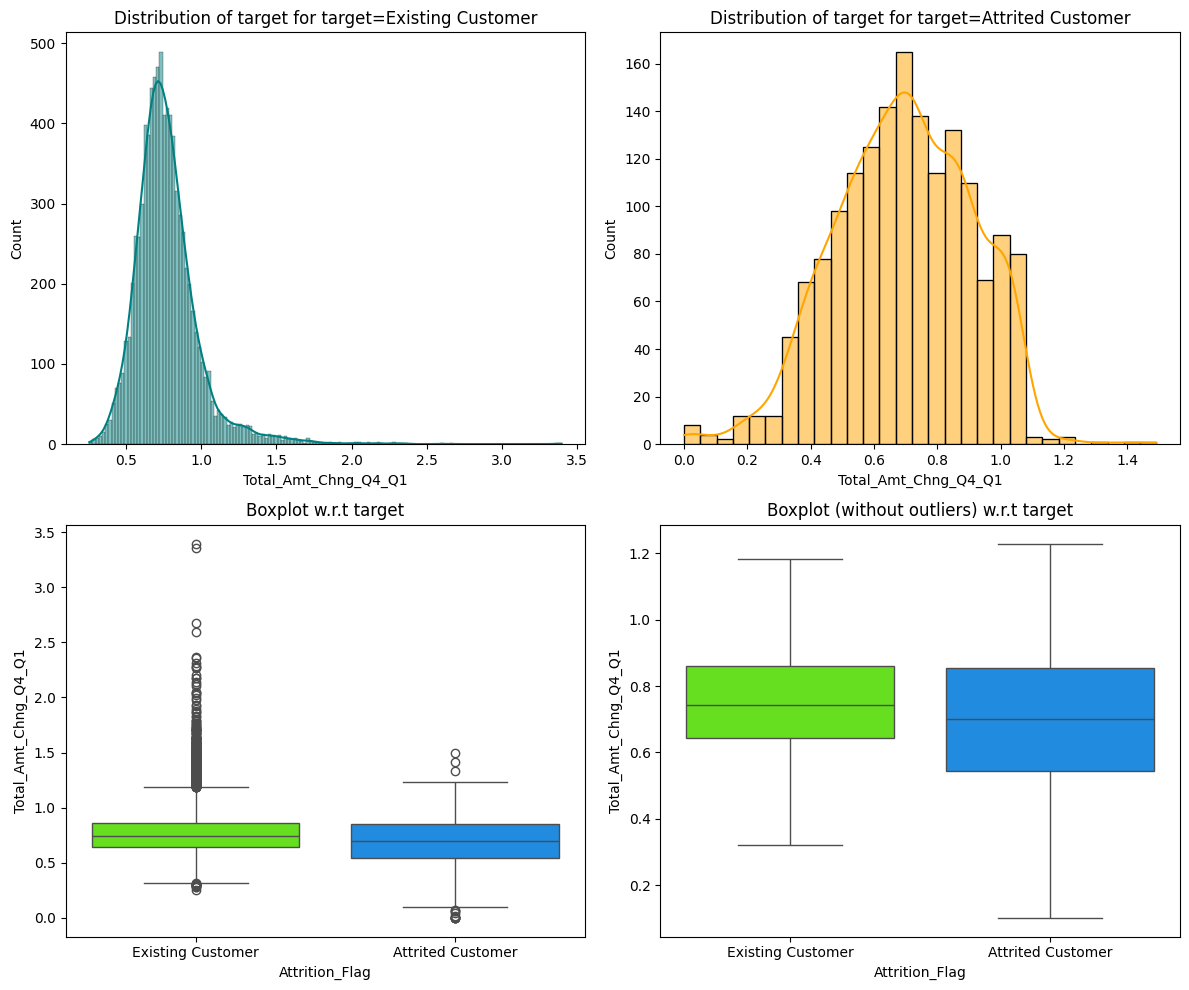

In [48]:
distribution_plot_wrt_target(data, 'Total_Amt_Chng_Q4_Q1', 'Attrition_Flag')

* There are quite a few outliers in the data. However, we will not remove them as they are proper values.
* Total_Amt_Chng_Q4_Q1 have a slighly right skewed distributions.

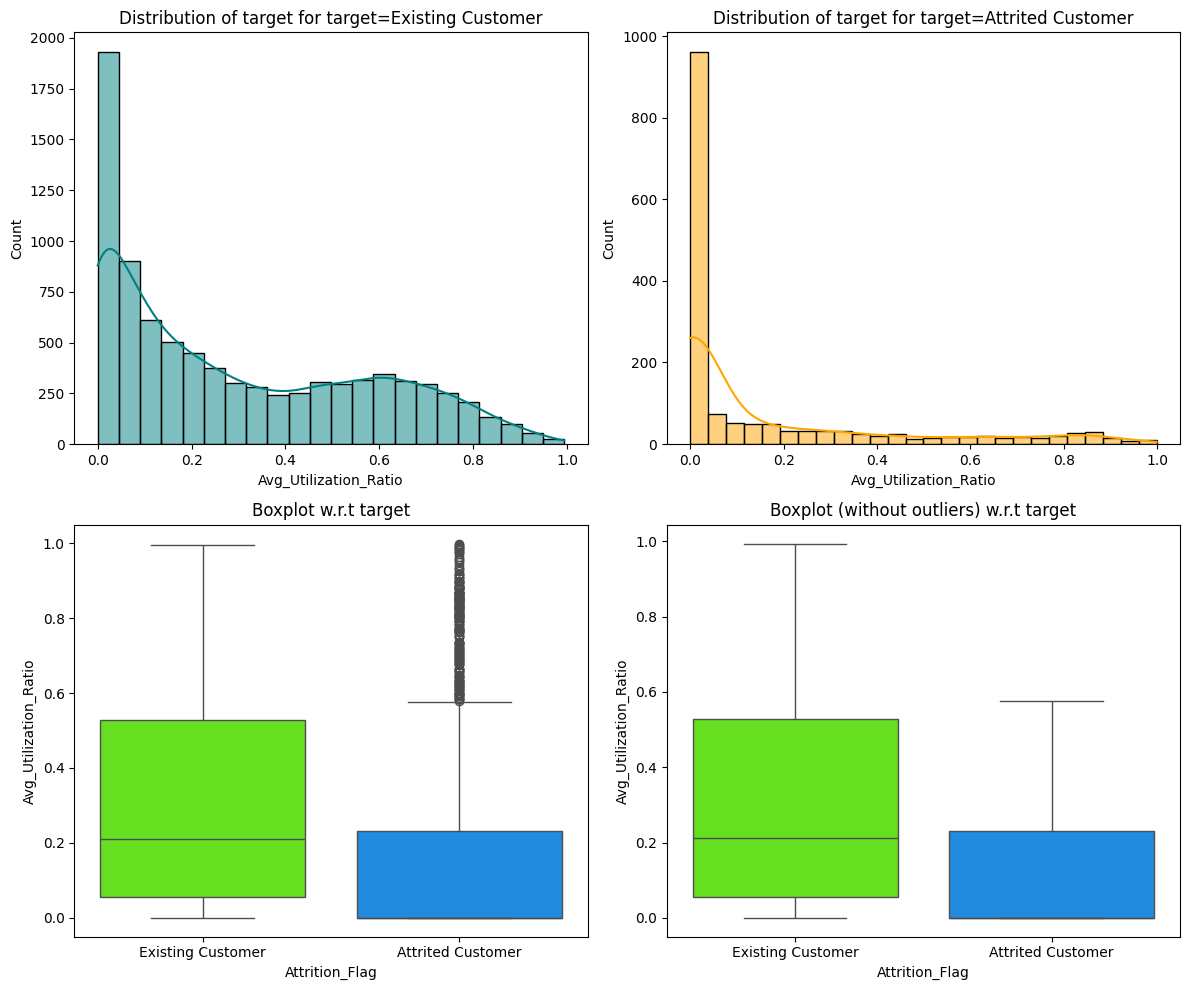

In [49]:
distribution_plot_wrt_target(data, 'Avg_Utilization_Ratio', 'Attrition_Flag')

* Customers with Avg_Utilization_Ratio above 0.2  is less likely to renounce their credit card services
* There is presence of outlier in the data.

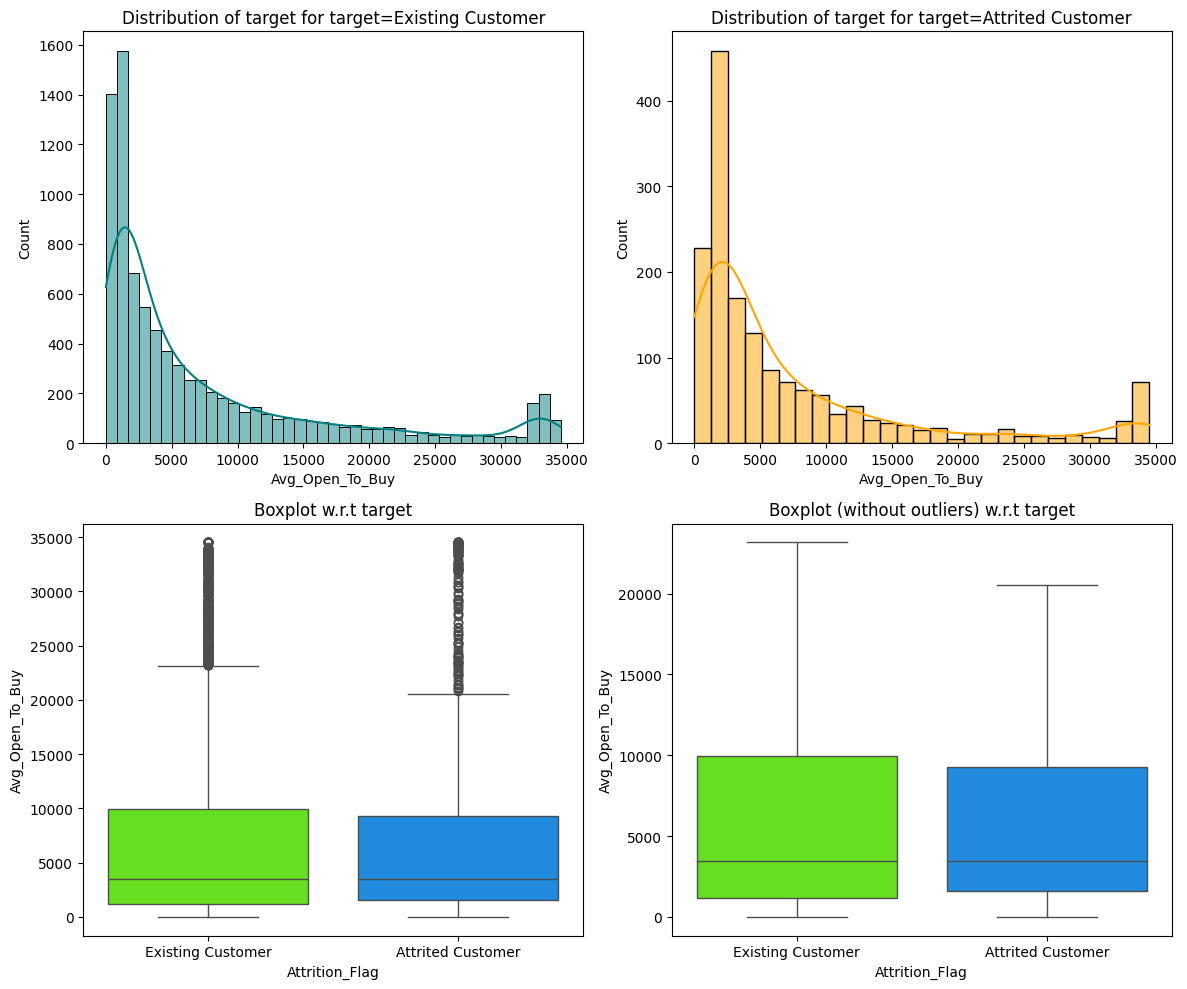

In [50]:
distribution_plot_wrt_target(data, 'Avg_Open_To_Buy', 'Attrition_Flag')

* The distribution is highly rightly skewed
* Amount left on the credit card to use (Avg_Open_To_Buy) don't seem to have any impact on the target variable

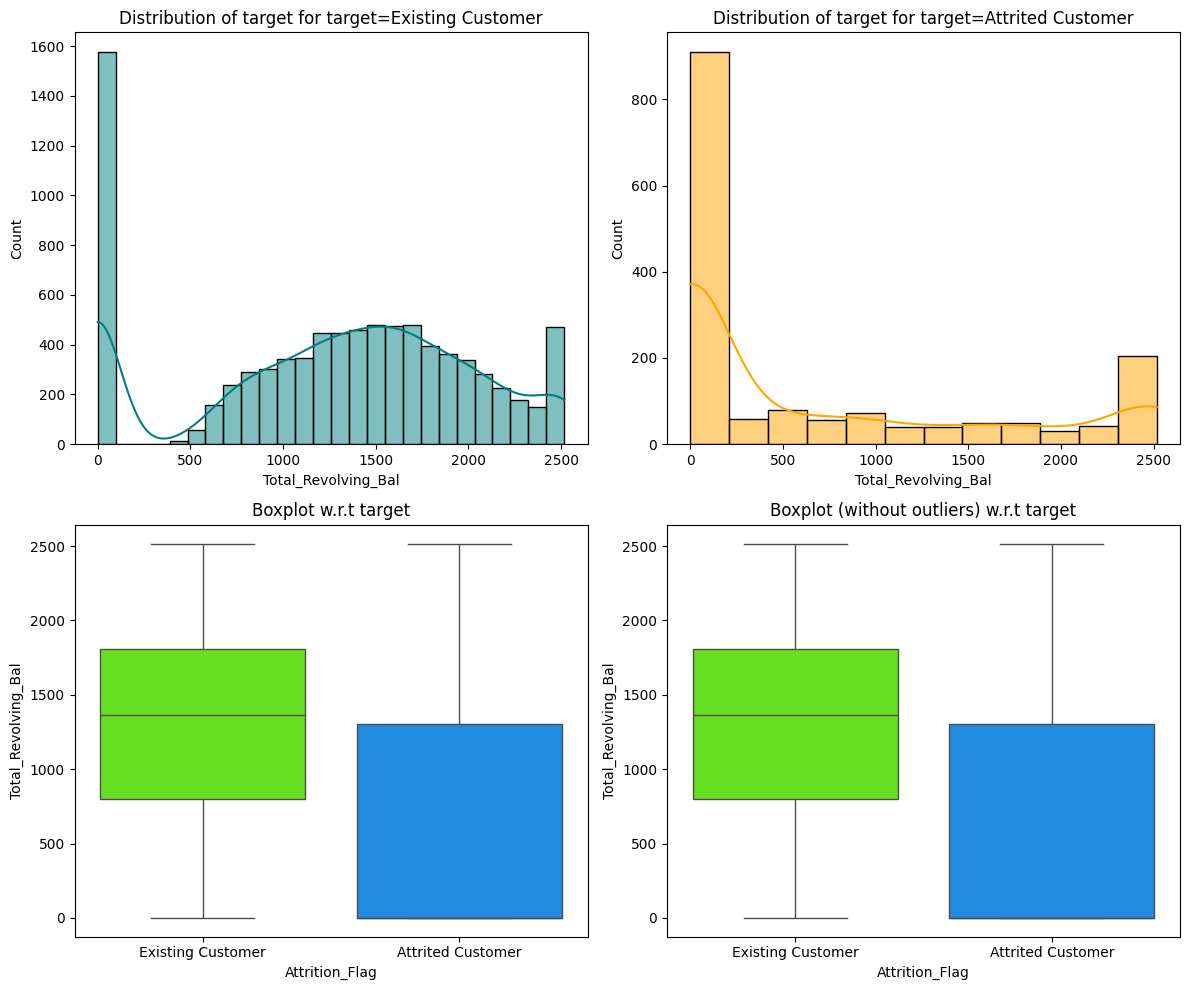

In [51]:
distribution_plot_wrt_target(data, 'Total_Revolving_Bal', 'Attrition_Flag')

* There's a stark difference between the customers with large end of the month closing balance and customer lower end of month closing balance
* Customers with an average of 1250 USD carried forward balance will less likely renounce their credit card service.

### Multivariate Analysis

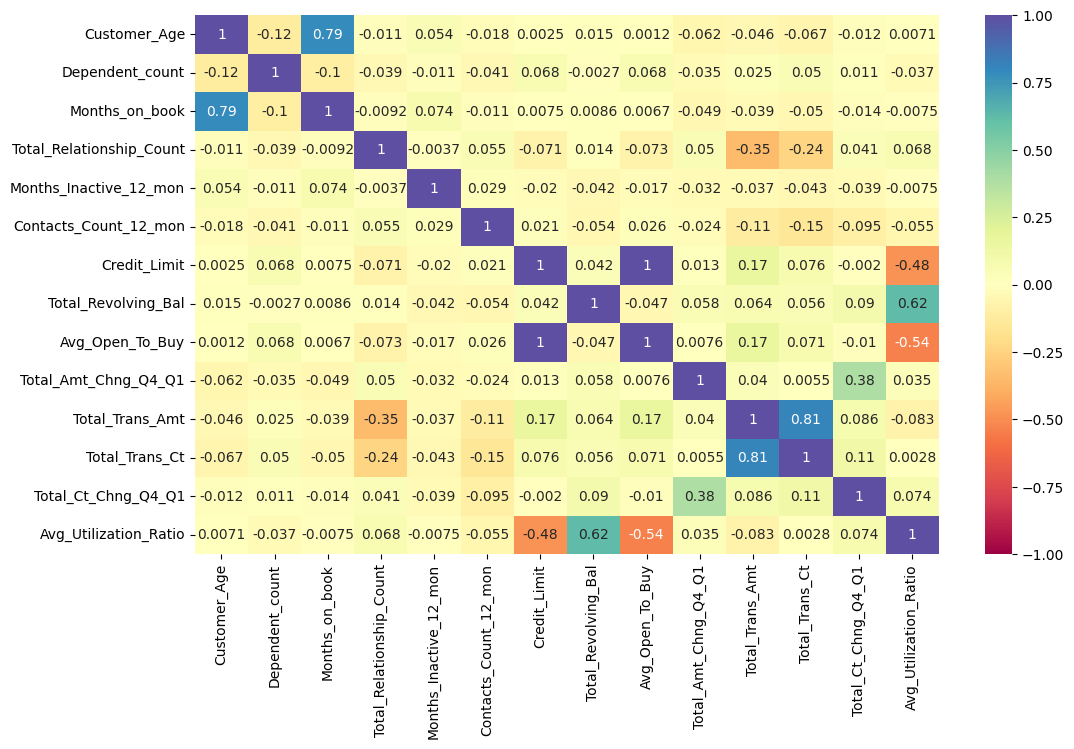

In [52]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral"
)
plt.show()

* Avg_Open_To_Buy and Credit_Limit has a perfect correlation. We might need to drop one of these fields during feature engineering.
* Total_Trans_Ct and Total_Trans_Amt has the strongest positive correlation in the sample dataset.
* There is a strong positive correlation between Months_on_book and Customer_Age.

## Data Pre-processing

###  Outlier Detection

#### Let's check for outliers in the data.

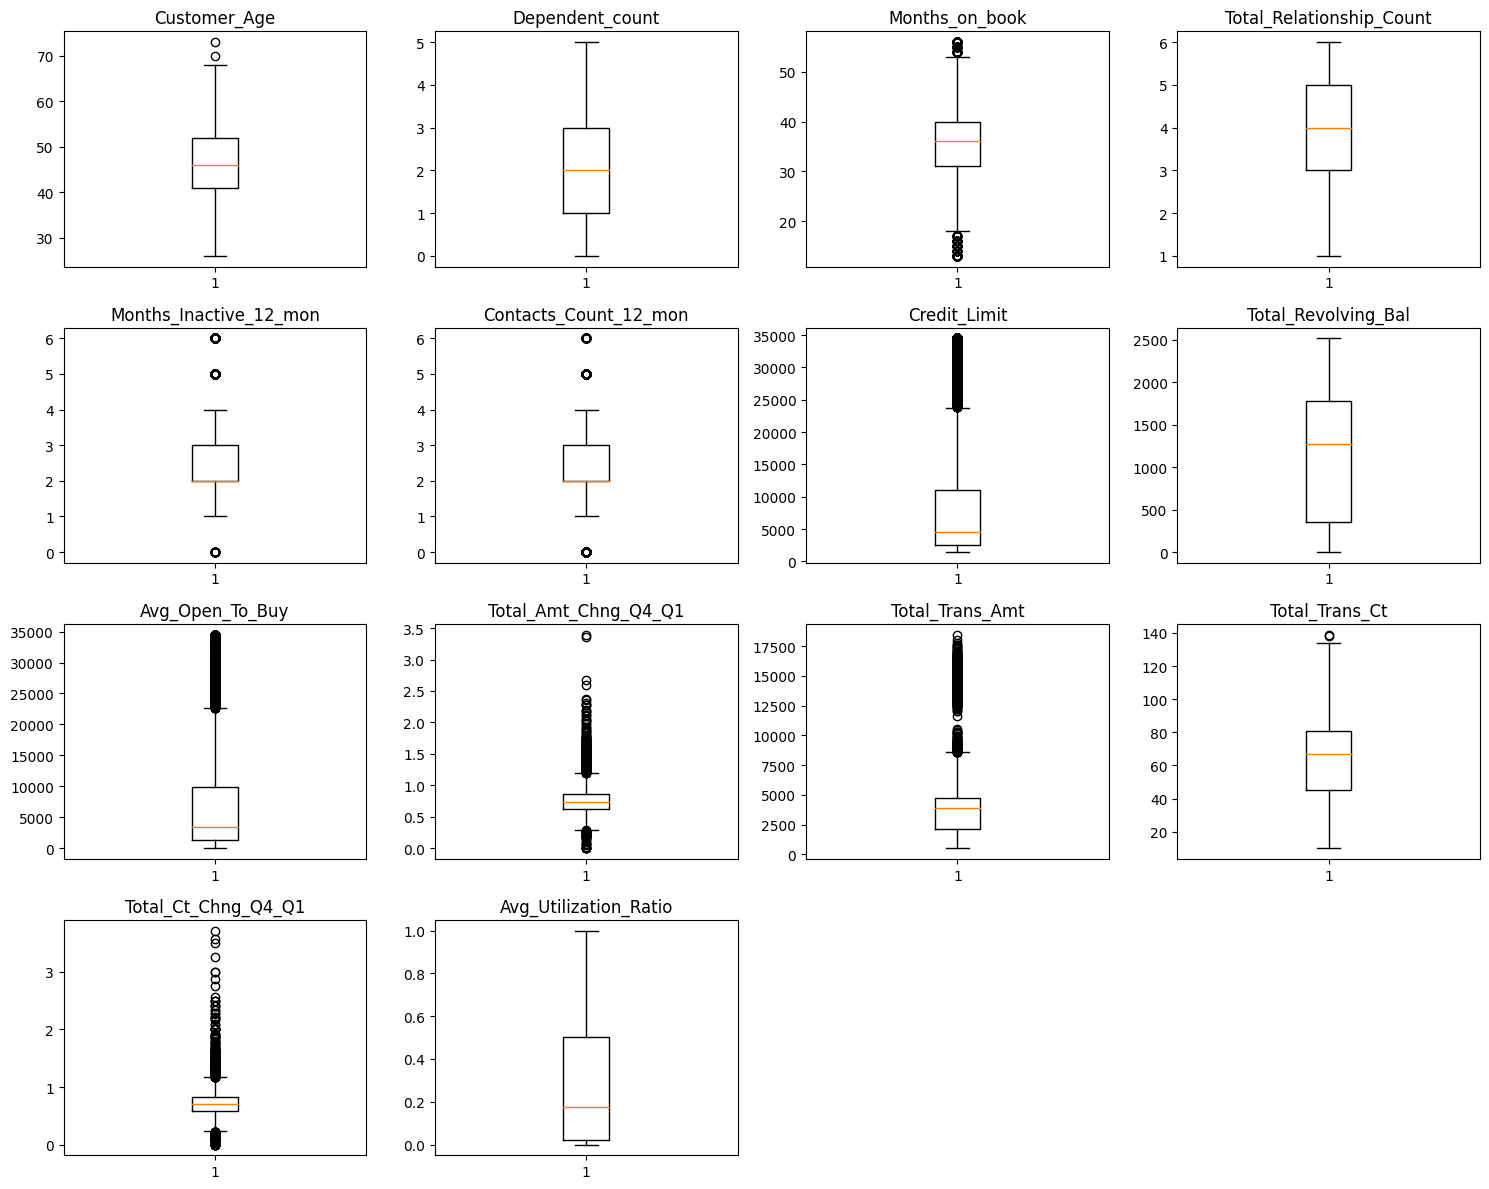

In [53]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

### Feature Engineering

In [54]:
df = data.copy() # create a copy of the dataframe

In [55]:
# we need to pass numerical values for each categorical column for imputation so we will label encode them
# pls note: most of these label encode can be done using label encoder or one-hot encoder. But i wanted to do it manually.

gender = {"M": 0, "F": 1}
df["Gender"] = df["Gender"].map(gender)


education_level = {
    "Uneducated": 0,
    "High School": 1,
    "College": 2,
    "Graduate": 3,
    "Post-Graduate": 4,
    "Doctorate": 5
}
df["Education_Level"] = df["Education_Level"].map(education_level)

marital_status = {"Single": 0, "Married": 1, "Divorced": 2}
df["Marital_Status"] = df["Marital_Status"].map(marital_status)


card_category = {
    "Blue": 0,
    "Gold": 1,
    "Silver": 2,
    "Platinum": 3
}
df["Card_Category"] = df["Card_Category"].map(card_category)

In [56]:
print(df['Income_Category'].unique()) # print unique value before replacing abc with null
# Income_category cannot be abc since is an Ordinal data. We will replace abc with NaN, then fillin the missing value.

df['Income_Category'].replace("abc", np.nan, inplace=True)
income_category = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$60K - $80K": 2,
    "$80K - $120K": 3,
    "$120K +": 4
}
df["Income_Category"] = df["Income_Category"].map(income_category)
print(df['Income_Category'].unique())  # print unique value after replacing abc with null

['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'abc']
[ 2.  0.  3.  1.  4. nan]


In [57]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,0,3,1.00000,1.00000,2.00000,0,39,5,1,3,12691.00000,777,11914.00000,1.33500,1144,42,1.62500,0.06100
1,Existing Customer,49,1,5,3.00000,0.00000,0.00000,0,44,6,1,2,8256.00000,864,7392.00000,1.54100,1291,33,3.71400,0.10500
2,Existing Customer,51,0,3,3.00000,1.00000,3.00000,0,36,4,1,0,3418.00000,0,3418.00000,2.59400,1887,20,2.33300,0.00000
3,Existing Customer,40,1,4,1.00000,NaN,0.00000,0,34,3,4,1,3313.00000,2517,796.00000,1.40500,1171,20,2.33300,0.76000
4,Existing Customer,40,0,3,0.00000,1.00000,2.00000,0,21,5,1,0,4716.00000,0,4716.00000,2.17500,816,28,2.50000,0.00000


* Values have been encoded for features
* We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

### Data Preparation for Modeling

In [58]:
X = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag'].apply(lambda x: 1 if x == "Attrited Customer" else 0 )

In [59]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [60]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


## Missing value imputation




In [61]:
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [62]:
from sklearn.impute import SimpleImputer

# Get list of categorical and numerical columns
# cat_cols = list(X_train.select_dtypes(include='object').columns)
num_cols = list(X_train.select_dtypes(include=['int', 'float']).columns)

# Impute categorical columns
# cat_imputer = SimpleImputer(strategy='most_frequent')
# X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
# X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
# X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# Impute numerical columns
num_imputer = SimpleImputer(strategy='mean')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [63]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* All missing values have been treated.
* Let's inverse map the encoded values.

### Reverse Mapping for Encoded Variables

In [64]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [65]:
inverse_mapping(gender, "Gender")
inverse_mapping(education_level, "Education_Level")
inverse_mapping(marital_status, "Marital_Status")
inverse_mapping(card_category, "Card_Category")
inverse_mapping(income_category, "Income_Category")

* Checking inverse mapped values/categories.

#### `Train Dataset`

In [66]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         1854
College          1546
High School      1228
Uneducated        881
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     3276
Single      2369
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2129
$40K - $60K       1713
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


#### `Validation Dataset`

In [67]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
Graduate         623
College          493
High School      404
Uneducated       306
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Married     1100
Single       770
Divorced     156
Name: Marital_Status, dtype: int64
******************************
Less than $40K    736
$40K - $60K       582
$80K - $120K      293
$60K - $80K       279
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************


#### `Test Dataset`

In [68]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

F    1070
M     956
Name: Gender, dtype: int64
******************************
Graduate         651
College          493
High School      381
Uneducated       300
Post-Graduate    103
Doctorate         98
Name: Education_Level, dtype: int64
******************************
Married     1060
Single       804
Divorced     162
Name: Marital_Status, dtype: int64
******************************
Less than $40K    696
$40K - $60K       607
$60K - $80K       292
$80K - $120K      289
$120K +           142
Name: Income_Category, dtype: int64
******************************
Blue        1876
Silver       119
Gold          26
Platinum       5
Name: Card_Category, dtype: int64
******************************


* Inverse mapping returned original labels.

In [69]:
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


### Creating Dummy Variables

In [70]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


* After encoding there are 29 columns.

In [71]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
800,40.00000,2.00000,21.00000,6.00000,4.00000,3.00000,20056.00000,1602.00000,18454.00000,0.46600,1687.00000,46.00000,0.53300,0.08000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
498,44.00000,1.00000,34.00000,6.00000,2.00000,0.00000,2885.00000,1895.00000,990.00000,0.38700,1366.00000,31.00000,0.63200,0.65700,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4356,48.00000,4.00000,36.00000,5.00000,1.00000,2.00000,6798.00000,2517.00000,4281.00000,0.87300,4327.00000,79.00000,0.88100,0.37000,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
407,41.00000,2.00000,36.00000,6.00000,2.00000,0.00000,27000.00000,0.00000,27000.00000,0.61000,1209.00000,39.00000,0.30000,0.00000,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1
8728,46.00000,4.00000,36.00000,2.00000,2.00000,3.00000,15034.00000,1356.00000,13678.00000,0.75400,7737.00000,84.00000,0.75000,0.09000,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

#### Model can make wrong predictions as:

* Predicting a customer will not renounce their credit cards but in reality the customer will (FN).
* Predicting a customer will renouuce their credit card but in reality the customer will not (FP).

#### Which case is more important?
* If we predict that a customer will not renounce their credit cards, but in reality the customer renounces it, this will lead the bank to loss of income.
* If we predict that a customer will renounce their credit cards, and they end up not renouncing it, this will lead to loss of resources.

#### How to reduce loses?
* `recall` should be maximized, the greater the recall, the higher the chances of minimizing false negatives.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [72]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [73]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Initial Model Building

### Model Building with original data

Sample code for model building with original data

In [74]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("xgb", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9815573770491803
Random forest: 1.0
GBM: 0.875
Adaboost: 0.826844262295082
dtree: 1.0
xgb: 1.0

Validation Performance:

Bagging: 0.8067484662576687
Random forest: 0.8098159509202454
GBM: 0.8588957055214724
Adaboost: 0.852760736196319
dtree: 0.8006134969325154
xgb: 0.8926380368098159


In [75]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9816, Validation Score: 0.8067, Difference: 0.1748
Random forest: Training Score: 1.0000, Validation Score: 0.8098, Difference: 0.1902
GBM: Training Score: 0.8750, Validation Score: 0.8589, Difference: 0.0161
Adaboost: Training Score: 0.8268, Validation Score: 0.8528, Difference: -0.0259
dtree: Training Score: 1.0000, Validation Score: 0.8006, Difference: 0.1994
xgb: Training Score: 1.0000, Validation Score: 0.8926, Difference: 0.1074


* GBM has the best performance model as per the validation performance

### Model Building with Oversampled data


In [76]:
print("Before Oversampling, counts of label 'Attrited Customer': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'Existing Customer': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Attrited Customer': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'Existing Customer': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Attrited Customer': 976
Before Oversampling, counts of label 'Existing Customer': 5099 

After Oversampling, counts of label 'Attrited Customer': 5099
After Oversampling, counts of label 'Existing Customer': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



In [77]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9976465973720338
Random forest: 1.0
GBM: 0.982349480290253
Adaboost: 0.9668562463228084
dtree: 1.0
Xgboost: 1.0

Validation Performance:

Bagging: 0.8282208588957055
Random forest: 0.8374233128834356
GBM: 0.8742331288343558
Adaboost: 0.8558282208588958
dtree: 0.8251533742331288
Xgboost: 0.8957055214723927


In [78]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9976, Validation Score: 0.8282, Difference: 0.1694
Random forest: Training Score: 1.0000, Validation Score: 0.8374, Difference: 0.1626
GBM: Training Score: 0.9823, Validation Score: 0.8742, Difference: 0.1081
Adaboost: Training Score: 0.9669, Validation Score: 0.8558, Difference: 0.1110
dtree: Training Score: 1.0000, Validation Score: 0.8252, Difference: 0.1748
Xgboost: Training Score: 1.0000, Validation Score: 0.8957, Difference: 0.1043


* GBM has the best performance model as per the validation performance

### Model Building with Undersampled data

In [79]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [80]:
print("Before Under Sampling, counts of label 'Attrited Customer': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'Existing Customer': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Attrited Customer': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'Existing Customer': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Attrited Customer': 976
Before Under Sampling, counts of label 'Existing Customer': 5099 

After Under Sampling, counts of label 'Attrited Customer': 976
After Under Sampling, counts of label 'Existing Customer': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



In [81]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("xgb", XGBClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9907786885245902
Random forest: 1.0
GBM: 0.9805327868852459
Adaboost: 0.9528688524590164
dtree: 1.0
xgb: 1.0

Validation Performance:

Bagging: 0.9263803680981595
Random forest: 0.9386503067484663
GBM: 0.9601226993865031
Adaboost: 0.9601226993865031
dtree: 0.9202453987730062
xgb: 0.9631901840490797


In [82]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9908, Validation Score: 0.9264, Difference: 0.0644
Random forest: Training Score: 1.0000, Validation Score: 0.9387, Difference: 0.0613
GBM: Training Score: 0.9805, Validation Score: 0.9601, Difference: 0.0204
Adaboost: Training Score: 0.9529, Validation Score: 0.9601, Difference: -0.0073
dtree: Training Score: 1.0000, Validation Score: 0.9202, Difference: 0.0798
xgb: Training Score: 1.0000, Validation Score: 0.9632, Difference: 0.0368


* GBM has the best performance followed by AdaBoost model as per the validation performance

- After building 15 models, it was observed that both the GBM and Adaboost models, trained on an undersampled dataset, as well as the GBM model trained on an oversampled dataset, exhibited strong performance on both the training and validation datasets.

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

### Gradient Boosting Model Tuning

#### Sample tuning method for Gradient boosting with original data

In [83]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8022344322344322:
CPU times: total: 3.52 s
Wall time: 42.4 s


In [84]:
tuned_gbm = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [85]:
# Checking model's performance on training set
tuned_gbm_t = model_performance_classification_sklearn(
    tuned_gbm, X_train, y_train
)
tuned_gbm_t

,Accuracy,Recall,Precision,F1
0,0.97202,0.86680,0.95485,0.90870


In [86]:
# Checking model's performance on validation set
tuned_gbm_v = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
tuned_gbm_v

,Accuracy,Recall,Precision,F1
0,0.97038,0.86810,0.94333,0.90415


#### Sample tuning method for Gradient boosting with oversampled data

In [87]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9439138717312245:
CPU times: total: 4.33 s
Wall time: 1min 33s


In [88]:
tuned_gbm_ov = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm_ov.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.7, random_state=1,
                           subsample=0.7)

In [89]:
# Checking model's performance on training set
tuned_gbm_ov_t = model_performance_classification_sklearn(
    tuned_gbm_ov, X_train_over, y_train_over
)
tuned_gbm_ov_t

,Accuracy,Recall,Precision,F1
0,0.93440,0.95783,0.91495,0.93590


In [90]:
# Checking model's performance on validation set
tuned_gbm_ov_v = model_performance_classification_sklearn(tuned_gbm_ov, X_val, y_val)
tuned_gbm_ov_v

,Accuracy,Recall,Precision,F1
0,0.90967,0.90184,0.66067,0.76265


#### Sample tuning method for Gradient boosting with undersampled data

In [91]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9538932496075354:
CPU times: total: 1.42 s
Wall time: 18.4 s


In [92]:
tuned_gbm_un = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [93]:
# Checking model's performance on training set
tuned_gbm_un_t = model_performance_classification_sklearn(
    tuned_gbm_un, X_train_un, y_train_un
)
tuned_gbm_un_t

,Accuracy,Recall,Precision,F1
0,0.97439,0.98156,0.96768,0.97457


In [94]:
# Checking model's performance on validation set
tuned_gbm_un_v = model_performance_classification_sklearn(tuned_gbm_un, X_val, y_val)
tuned_gbm_un_v

,Accuracy,Recall,Precision,F1
0,0.94373,0.96012,0.75604,0.84595


### AdaBoosting Model Tuning

#### Sample tuning method for Ada boosting with original data

In [95]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
   "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8360544217687075:
CPU times: total: 2.95 s
Wall time: 29.8 s


In [96]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [97]:
# Checking model's performance on training set
tuned_adb_t = model_performance_classification_sklearn(tuned_adb, X_train, y_train)
tuned_adb_t

,Accuracy,Recall,Precision,F1
0,0.98222,0.92725,0.96072,0.94369


In [98]:
# Checking model's performance on validation set
tuned_adb_v = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
tuned_adb_v

,Accuracy,Recall,Precision,F1
0,0.96693,0.85583,0.93311,0.89280


#### Sample tuning method for Ada boosting with oversampled data

In [99]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
   "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 75, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9405801535530799:
CPU times: total: 3.77 s
Wall time: 1min 3s


In [100]:
tuned_adb_ov = AdaBoostClassifier(
    random_state=1,
    n_estimators=75,
    learning_rate=0.01,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb_ov.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.01, n_estimators=75, random_state=1)

In [101]:
# Checking model's performance on training set
tuned_adb_ov_t = model_performance_classification_sklearn(tuned_adb_ov, X_train_over, y_train_over)
tuned_adb_ov_t

,Accuracy,Recall,Precision,F1
0,0.92832,0.95450,0.90701,0.93015


In [102]:
# Checking model's performance on validation set
tuned_adb_ov_v = model_performance_classification_sklearn(tuned_adb_ov, X_val, y_val)
tuned_adb_ov_v

,Accuracy,Recall,Precision,F1
0,0.89733,0.88650,0.62826,0.73537


#### Sample tuning method for Ada boosting with undersampled data

In [103]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
   "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9477551020408164:
CPU times: total: 875 ms
Wall time: 12.7 s


In [104]:
tuned_adb_un = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [105]:
# Checking model's performance on training set
tuned_adb_un_t = model_performance_classification_sklearn(tuned_adb_un, X_train_un, y_train_un)
tuned_adb_un_t

,Accuracy,Recall,Precision,F1
0,0.99180,0.99693,0.98682,0.99185


In [106]:
# Checking model's performance on validation set
tuned_adb_un_v = model_performance_classification_sklearn(tuned_adb_un, X_val, y_val)
tuned_adb_un_v

,Accuracy,Recall,Precision,F1
0,0.94028,0.97853,0.73672,0.84058


### Decision Tree Model Tuning

#### Sample tuning method for Decision tree with original data

In [107]:
%%time

# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_depth': np.arange(2,6),
                'min_samples_leaf': [1, 4, 7],
                'max_leaf_nodes' : [10, 15],
                'min_impurity_decrease': [0.0001,0.001] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.751941391941392:
CPU times: total: 125 ms
Wall time: 465 ms


In [108]:
# Creating new pipeline with best parameters
dtree_tuned = DecisionTreeClassifier(
    random_state=1,  max_depth=5, min_samples_leaf=7, max_leaf_nodes=15, min_impurity_decrease=0.0001
)

# Fit the model on training data
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [109]:
# Calculating different metrics on train set
tuned_dtr3_t = model_performance_classification_sklearn(
    dtree_tuned, X_train, y_train
)
tuned_dtr3_t

,Accuracy,Recall,Precision,F1
0,0.93877,0.80533,0.81198,0.80864


In [110]:
# Calculating different metrics on validation set
tuned_dtr3_v = model_performance_classification_sklearn(dtree_tuned, X_val, y_val)
tuned_dtr3_v

,Accuracy,Recall,Precision,F1
0,0.93040,0.78221,0.78462,0.78341


#### Sample tuning method for Decision tree with oversampled data

In [111]:
%%time

# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_depth': np.arange(2,6),
                'min_samples_leaf': [1, 4, 7],
                'max_leaf_nodes' : [10, 15],
                'min_impurity_decrease': [0.0001,0.001] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.9080249764282552:
CPU times: total: 203 ms
Wall time: 887 ms


In [112]:
# Creating new pipeline with best parameters
dtree_tuned_ov = DecisionTreeClassifier(
    random_state=1, max_depth=4, min_samples_leaf=1, max_leaf_nodes=15, min_impurity_decrease=0.001
)

# Fit the model on training data
dtree_tuned_ov.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, random_state=1)

In [113]:
# Calculating different metrics on train set
tuned_dtr3_ov_t = model_performance_classification_sklearn(
    dtree_tuned_ov, X_train_over, y_train_over
)
tuned_dtr3_ov_t

,Accuracy,Recall,Precision,F1
0,0.91783,0.90998,0.92449,0.91718


In [114]:
# Calculating different metrics on validation set
tuned_dtr3_ov_v = model_performance_classification_sklearn(dtree_tuned_ov, X_val, y_val)
tuned_dtr3_ov_v

,Accuracy,Recall,Precision,F1
0,0.91165,0.85583,0.67883,0.75712


#### Sample tuning method for Decision tree with undersampled data

In [115]:
%%time

# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_depth': np.arange(2,6),             
                'min_samples_leaf': [1, 4, 7],
                'max_leaf_nodes' : [10, 15],
                'min_impurity_decrease': [0.0001,0.001] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.8934432234432235:
CPU times: total: 46.9 ms
Wall time: 284 ms


In [116]:
# Creating new pipeline with best parameters
dtree_tuned_un = DecisionTreeClassifier(
    random_state=1, max_depth=5, min_samples_leaf=7, max_leaf_nodes=15, min_impurity_decrease=0.0001
)

# Fit the model on training data
dtree_tuned_un.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [117]:
# Calculating different metrics on train set
tuned_dtr3_un_t = model_performance_classification_sklearn(
    dtree_tuned_un, X_train_un, y_train_un
)
tuned_dtr3_un_t

,Accuracy,Recall,Precision,F1
0,0.91393,0.93955,0.89376,0.91608


In [118]:
# Calculating different metrics on validation set
tuned_dtr3_un_v = model_performance_classification_sklearn(dtree_tuned_un, X_val, y_val)
tuned_dtr3_un_v

,Accuracy,Recall,Precision,F1
0,0.86723,0.92025,0.55249,0.69045


### Bagging Classifier Model Tuning

* Sample tuning method for Decision tree with original data

In [119]:
%%time

# Choose the type of classifier. 
bagging_model = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
                'max_samples': [0.8,0.9,1],
                'max_features': [0.7,0.8,0.9],
                'n_estimators' : [30,50,70],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_cv = GridSearchCV(bagging_model, parameters, scoring=scorer,cv=5)
grid_cv = grid_cv.fit(X_train, y_train)

# Set the clf to the best combination of parameters
tuned_bag = grid_cv.best_estimator_


# Fit the best algorithm to the data.
tuned_bag.fit(X_train, y_train)

CPU times: total: 2min 2s
Wall time: 4min 4s


BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=70,
                  random_state=1)

In [120]:
# Checking model's performance on training set
tuned_bag_t=model_performance_classification_sklearn(tuned_bag,X_train,y_train)
tuned_bag_t

,Accuracy,Recall,Precision,F1
0,0.99934,0.99693,0.99897,0.99795


In [121]:
# Checking model's performance on validation set
tuned_bag_v=model_performance_classification_sklearn(tuned_bag,X_val,y_val)
tuned_bag_v

,Accuracy,Recall,Precision,F1
0,0.96347,0.84356,0.92282,0.88141


* Sample tuning method for Decision tree with oversampled data

In [122]:
%%time

# Choose the type of classifier. 
bagging_model = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
                'max_samples': [0.8,0.9,1],
                'max_features': [0.7,0.8,0.9],
                'n_estimators' : [30,50,70],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_cv = GridSearchCV(bagging_model, parameters, scoring=scorer,cv=5)
grid_cv = grid_cv.fit(X_train_over, y_train_over)


# Set the clf to the best combination of parameters
tuned_bag_ov = grid_cv.best_estimator_


# Fit the best algorithm to the data.
tuned_bag_ov.fit(X_train_over, y_train_over)

CPU times: total: 4min 49s
Wall time: 10min 2s


BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=70,
                  random_state=1)

In [123]:
# Checking model's performance on training set
tuned_bag_ov_t=model_performance_classification_sklearn(tuned_bag_ov,X_train_over,y_train_over)
tuned_bag_ov_t

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


In [124]:
# Checking model's performance on validation set
tuned_bag_ov_v=model_performance_classification_sklearn(tuned_bag_ov,X_val,y_val)
tuned_bag_ov_v

,Accuracy,Recall,Precision,F1
0,0.96199,0.89877,0.86944,0.88386


* Sample tuning method for Decision tree with undersampled data

In [125]:
%%time

# Choose the type of classifier. 
bagging_model = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
                'max_samples': [0.8,0.9,1],
                'max_features': [0.7,0.8,0.9],
                'n_estimators' : [30,50,70],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_cv = GridSearchCV(bagging_model, parameters, scoring=scorer,cv=5)

#Fitting parameters in GridSeachCV
grid_cv = grid_cv.fit(X_train_un, y_train_un)


# Set the clf to the best combination of parameters
tuned_bag_un = grid_cv.best_estimator_


# Fit the best algorithm to the data.
tuned_bag_un.fit(X_train_un, y_train_un)

CPU times: total: 39.9 s
Wall time: 1min 21s


BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=30,
                  random_state=1)

In [126]:
# Checking model's performance on training set
tuned_bag_un_t=model_performance_classification_sklearn(tuned_bag_un,X_train_un,y_train_un)
tuned_bag_un_t

,Accuracy,Recall,Precision,F1
0,0.50000,1.00000,0.50000,0.66667


In [127]:
# Checking model's performance on validation set
tuned_bag_un_v=model_performance_classification_sklearn(tuned_bag_un,X_val,y_val)
tuned_bag_un_v

,Accuracy,Recall,Precision,F1
0,0.16091,1.00000,0.16091,0.27721


### Random Forest Classifier Model Tuning

* Sample tuning method for Random Forest with original data

In [128]:
# Choose the type of classifier. 
rf_model = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_cv = GridSearchCV(rf_model, parameters, scoring=scorer,cv=5)
grid_cv = grid_cv.fit(X_train, y_train)

# Set the clf to the best combination of parameters
tuned_rf = grid_cv.best_estimator_

# Fit the best algorithm to the data.
tuned_rf.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.5, n_estimators=25, random_state=1)

In [129]:
# Checking model's performance on training set
tuned_rf_t=model_performance_classification_sklearn(tuned_rf,X_train,y_train)
tuned_rf_t

,Accuracy,Recall,Precision,F1
0,0.98996,0.94467,0.99247,0.96798


In [130]:
# Checking model's performance on validation set
tuned_rf_v=model_performance_classification_sklearn(tuned_rf,X_val,y_val)
tuned_rf_v

,Accuracy,Recall,Precision,F1
0,0.95015,0.76994,0.90614,0.83250


* Sample tuning method for Random Forest with oversampled data

In [131]:
# Choose the type of classifier. 
rf_model = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_cv = GridSearchCV(rf_model, parameters, scoring=scorer,cv=5)

#Fitting parameters in GridSeachCV
grid_cv = grid_cv.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
tuned_rf_ov = grid_cv.best_estimator_

# Fit the best algorithm to the data.
tuned_rf_ov.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=0.6, n_estimators=110, random_state=1)

In [132]:
# Checking model's performance on training set
tuned_rf_ov_t=model_performance_classification_sklearn(tuned_rf_ov,X_train_over,y_train_over)
tuned_rf_ov_t

,Accuracy,Recall,Precision,F1
0,0.99941,1.00000,0.99882,0.99941


In [133]:
# Checking model's performance on validation set
tuned_rf_ov_v=model_performance_classification_sklearn(tuned_rf_ov,X_val,y_val)
tuned_rf_ov_v

,Accuracy,Recall,Precision,F1
0,0.95163,0.81902,0.87255,0.84494


* Sample tuning method for Random Forest with undersampled data

In [134]:
# Choose the type of classifier. 
rf_model = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_cv = GridSearchCV(rf_model, parameters, scoring=scorer,cv=5)

#Fitting parameters in GridSeachCV
grid_cv = grid_cv.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
tuned_rf_un = grid_cv.best_estimator_

# Fit the best algorithm to the data.
tuned_rf_un.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.6, n_estimators=110, random_state=1)

In [135]:
# Checking model's performance on training set
tuned_rf_un_t=model_performance_classification_sklearn(tuned_rf_un,X_train_un,y_train_un)
tuned_rf_un_t

,Accuracy,Recall,Precision,F1
0,0.99744,0.99898,0.99591,0.99744


In [136]:
# Checking model's performance on validation set
tuned_rf_un_v=model_performance_classification_sklearn(tuned_rf_un,X_val,y_val)
tuned_rf_un_v

,Accuracy,Recall,Precision,F1
0,0.92942,0.91718,0.72048,0.80702


### XGBoost Model Tuning

* Sample tuning method for XGBoost with original data

In [137]:
%%time

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={
               'n_estimators':np.arange(50,110,25),
                'scale_pos_weight':[1,2,5],
                'learning_rate':[0.01,0.1,0.05],
                'gamma':[1,3],
                'subsample':[0.7,0.9]
            }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters are {'gamma': 3, 'learning_rate': 0.05, 'n_estimators': 100, 'scale_pos_weight': 5, 'subsample': 0.9} with CV score=0.9211041339612768:
CPU times: total: 4.11 s
Wall time: 32.1 s


In [138]:
# building model with best parameters
tuned_xgb = XGBClassifier(
    random_state=1,
    n_estimators=100,
    scale_pos_weight=5,
    subsample=0.9,
    learning_rate=0.05,
    gamma=3,
)

# Fit the model on training data
tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [139]:
# Calculating different metrics on train set
tuned_xgb_t = model_performance_classification_sklearn(
    tuned_xgb, X_train, y_train
)
tuned_xgb_t

,Accuracy,Recall,Precision,F1
0,0.98058,1.00000,0.89214,0.94300


In [140]:
# Calculating different metrics on validation set
tuned_xgb_v = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
tuned_xgb_v

,Accuracy,Recall,Precision,F1
0,0.95854,0.94172,0.82527,0.87966


* Sample tuning method for XGBoost with oversampled data

In [141]:
%%time

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={
               'n_estimators':np.arange(50,110,25),
                'scale_pos_weight':[1,2,5],
                'learning_rate':[0.01,0.1,0.05],
                'gamma':[1,3],
                'subsample':[0.7,0.9]
            }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train_over,y_train_over)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters are {'gamma': 1, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 5, 'subsample': 0.7} with CV score=0.9998039215686274:
CPU times: total: 3.64 s
Wall time: 45.9 s


In [142]:
# building model with best parameters
tuned_xgb_ov = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=5,
    subsample=0.7,
    learning_rate=0.01,
    gamma=1,
)

# Fit the model on training data
tuned_xgb_ov.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [143]:
# Calculating different metrics on train set
tuned_xgb_ov_t = model_performance_classification_sklearn(
    tuned_xgb_ov, X_train_over, y_train_over
)
tuned_xgb_ov_t

,Accuracy,Recall,Precision,F1
0,0.79319,1.00000,0.70741,0.82863


In [144]:
# Calculating different metrics on validation set
tuned_xgb_ov_v = model_performance_classification_sklearn(tuned_xgb_ov, X_val, y_val)
tuned_xgb_ov_v

,Accuracy,Recall,Precision,F1
0,0.65548,1.00000,0.31836,0.48296


* Sample tuning method for XGBoost with undersampled data

In [145]:
%%time

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={
               'n_estimators':np.arange(50,110,25),
                'scale_pos_weight':[1,2,5],
                'learning_rate':[0.01,0.1,0.05],
                'gamma':[1,3],
                'subsample':[0.7,0.9]
            }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train_un,y_train_un)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters are {'gamma': 1, 'learning_rate': 0.01, 'n_estimators': 50, 'scale_pos_weight': 5, 'subsample': 0.7} with CV score=0.9979591836734695:
CPU times: total: 2.72 s
Wall time: 18.5 s


In [146]:
# building model with best parameters
tuned_xgb_un = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=5,
    subsample=0.7,
    learning_rate=0.01,
    gamma=1,
)

# Fit the model on training data
tuned_xgb_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [147]:
# Calculating different metrics on train set
tuned_xgb_un_t = model_performance_classification_sklearn(
    tuned_xgb_un, X_train_un, y_train_un
)
tuned_xgb_un_t

,Accuracy,Recall,Precision,F1
0,0.76383,1.00000,0.67919,0.80895


In [148]:
# Calculating different metrics on validation set
tuned_xgb_un_v = model_performance_classification_sklearn(tuned_xgb_un, X_val, y_val)
tuned_xgb_un_v

,Accuracy,Recall,Precision,F1
0,0.58539,1.00000,0.27959,0.43700


## Model Comparison and Final Model Selection

In [149]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        tuned_gbm_t.T,
        tuned_gbm_ov_t.T,
        tuned_gbm_un_t.T,
        tuned_adb_t.T,
        tuned_adb_ov_t.T,
        tuned_adb_un_t.T,        
        tuned_dtr3_t.T,
        tuned_dtr3_ov_t.T,
        tuned_dtr3_un_t.T,
        tuned_bag_t.T,
        tuned_bag_ov_t.T,
        tuned_bag_un_t.T,       
        tuned_rf_t.T,
        tuned_rf_ov_t.T,
        tuned_rf_un_t.T,           
        tuned_xgb_t.T,
        tuned_xgb_ov_t.T,
        tuned_xgb_un_t.T,        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "GradBoost",
    "GradBoost over",
    "GradBoost under",
    "AdaBoost",
    "AdaBoost over",
    "AdaBoost under",
    "Dtree",
    "Dtree over",
    "Dtree under",
    "Bagging",
    "Bagging over",
    "Bagging under",
    "RForest",
    "RForest over",
    "RForest under",    
    "XGBoost",
    "XGBoost over",
    "XGBoost under", 
]
print("Trained model- over means: oversampled data, under means: undersampled data")
print("Training performance comparison:")
models_train_comp_df

Trained model- over means: oversampled data, under means: undersampled data
Training performance comparison:


,GradBoost,GradBoost over,GradBoost under,AdaBoost,AdaBoost over,AdaBoost under,Dtree,Dtree over,Dtree under,Bagging,Bagging over,Bagging under,RForest,RForest over,RForest under,XGBoost,XGBoost over,XGBoost under
Accuracy,0.97202,0.93440,0.97439,0.98222,0.92832,0.99180,0.93877,0.91783,0.91393,0.99934,1.00000,0.50000,0.98996,0.99941,0.99744,0.98058,0.79319,0.76383
Recall,0.86680,0.95783,0.98156,0.92725,0.95450,0.99693,0.80533,0.90998,0.93955,0.99693,1.00000,1.00000,0.94467,1.00000,0.99898,1.00000,1.00000,1.00000
Precision,0.95485,0.91495,0.96768,0.96072,0.90701,0.98682,0.81198,0.92449,0.89376,0.99897,1.00000,0.50000,0.99247,0.99882,0.99591,0.89214,0.70741,0.67919
F1,0.90870,0.93590,0.97457,0.94369,0.93015,0.99185,0.80864,0.91718,0.91608,0.99795,1.00000,0.66667,0.96798,0.99941,0.99744,0.94300,0.82863,0.80895


In [150]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        tuned_gbm_v.T,
        tuned_gbm_ov_v.T,
        tuned_gbm_un_v.T,
        tuned_adb_v.T,
        tuned_adb_ov_v.T,
        tuned_adb_un_v.T,        
        tuned_dtr3_v.T,
        tuned_dtr3_ov_v.T,
        tuned_dtr3_un_v.T,
        tuned_bag_v.T,
        tuned_bag_ov_v.T,
        tuned_bag_un_v.T,       
        tuned_rf_v.T,
        tuned_rf_ov_v.T,
        tuned_rf_un_v.T,           
        tuned_xgb_v.T,
        tuned_xgb_ov_v.T,
        tuned_xgb_un_v.T,        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "GradBoost",
    "GradBoost over",
    "GradBoost under",
    "AdaBoost",
    "AdaBoost over",
    "AdaBoost under",
    "Dtree",
    "Dtree over",
    "Dtree under",
    "Bagging",
    "Bagging over",
    "Bagging under",
    "RForest",
    "RForest over",
    "RForest under",    
    "XGBoost",
    "XGBoost over",
    "XGBoost under", 
]
print("Trained model- over means: oversampled, under means: undersampled data")
print("Training performance comparison:")
models_train_comp_df

Trained model- over means: oversampled, under means: undersampled data
Training performance comparison:


,GradBoost,GradBoost over,GradBoost under,AdaBoost,AdaBoost over,AdaBoost under,Dtree,Dtree over,Dtree under,Bagging,Bagging over,Bagging under,RForest,RForest over,RForest under,XGBoost,XGBoost over,XGBoost under
Accuracy,0.97038,0.90967,0.94373,0.96693,0.89733,0.94028,0.93040,0.91165,0.86723,0.96347,0.96199,0.16091,0.95015,0.95163,0.92942,0.95854,0.65548,0.58539
Recall,0.86810,0.90184,0.96012,0.85583,0.88650,0.97853,0.78221,0.85583,0.92025,0.84356,0.89877,1.00000,0.76994,0.81902,0.91718,0.94172,1.00000,1.00000
Precision,0.94333,0.66067,0.75604,0.93311,0.62826,0.73672,0.78462,0.67883,0.55249,0.92282,0.86944,0.16091,0.90614,0.87255,0.72048,0.82527,0.31836,0.27959
F1,0.90415,0.76265,0.84595,0.89280,0.73537,0.84058,0.78341,0.75712,0.69045,0.88141,0.88386,0.27721,0.83250,0.84494,0.80702,0.87966,0.48296,0.43700


* XGBoost trained with oversampling data, XGBoost trained with undersampling data, and Bagging trained with undersampling data has a perfect recall score on validation data, and giving a gerneralized performance as compaered to other models.

* XGBoost trained with oversampling data model is the best model among the above mentioned model as it has the highest Accuracy and precision score when compare to XGBoost trained with undersampling data, and Bagging trained with undersampling data

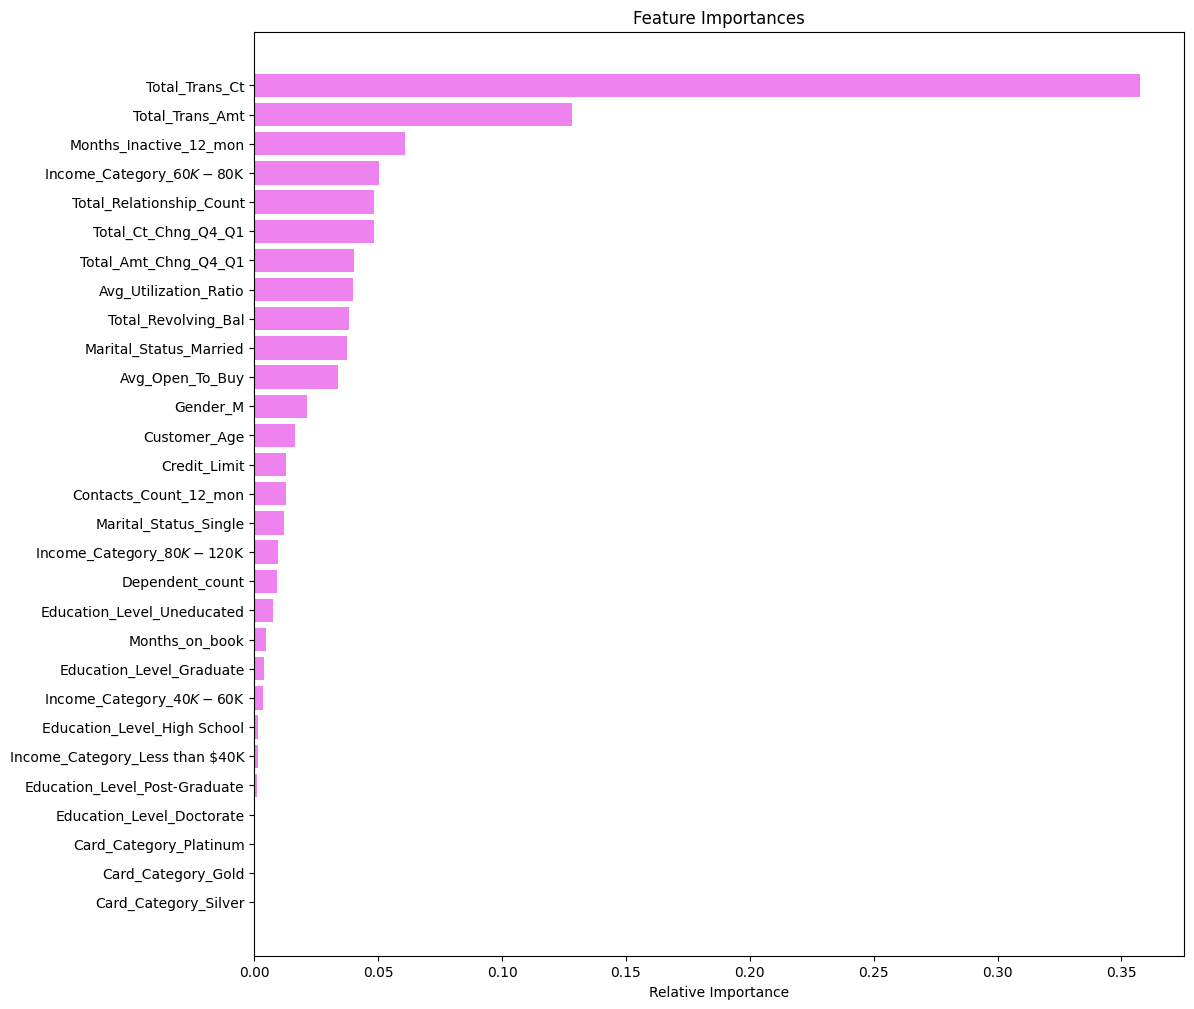

In [151]:
feature_names = X_train.columns
importances = tuned_xgb_ov.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- We can see that Total_Trans_Ct, Total_Trans_Amt, Months_inactive_12_mon are the most important features for making predictions

### Test set final performance

In [152]:
# Let's check the performance on test set
xgb_test = model_performance_classification_sklearn(tuned_xgb_ov, X_test, y_test)
xgb_test

,Accuracy,Recall,Precision,F1
0,0.63968,1.00000,0.30806,0.47101


* The XGBoost model trained on oversampled data has given ~100% recall on the test set
* This performance is in line with what we achieved with this model on the train and validation sets
* So, this is a generalized model

# Business Insights and Conclusions

* Customers with total transaction count less than 50 within the last 12 month would most likely leave the bank's credit card services.
* Once the desired performance is achieved from the model, the bank can use it to ~100% predict the customers that will renounce their credit card and those that won't.
* Customers with total transaction amount lower than 2300 USD within the last 12 month will highly leave the bank's credit card service.
* Customers whose card are inactive for over 3 months will likely renounce their credit card services.
* We need to further investigate the customers with 0 Months_Inactive_12_mon as ~52% of these customers in the sample data renounced their credit card. The customers that fall under these group are only ~0.002%. More data might be needed for further analysis.

***